In [1]:
import pandas as pd
import networkx as nx
import pygraphviz as pgv
from path_calc import Solver
from matplotlib import pyplot as plt
import numpy as np
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
import random


In [47]:
G = nx.read_weighted_edgelist('collectri_network_sscp.sif', delimiter = '\t', create_using = nx.DiGraph)

# 2. Iterate through each edge and 3. Set attributes
for u, v, data in G.edges(data=True):
    weight = data['weight']
    data['sign'] = 1 if weight >= 0 else -1
    data['weight'] = abs(weight)


# Trynska data

In [48]:
target_df = pd.read_csv('downstream_hits.tsv', sep='\t', header=None)
target_df.drop(1, inplace=True, axis=1)

target_names = target_df[0]
len(target_names)

100

In [49]:
target_df[2].replace({'+': 1, '-': -1}, inplace=True)
target_df.set_index(0, inplace=True)
target_df

2
0         
CINP     1
ATP1B1   1
DNAJC12  1
SCCPDH   1
IDS      1
...     ..
IKZF1   -1
SDHD     1
RASGRP3  1
BIRC6   -1
LDLR    -1

[100 rows x 1 columns]

In [50]:
def train_test_split(target_dict, n=10):
    test_keys = random.sample(list(target_dict.keys()), n)
    train_keys = [f for f in list(target_dict.keys()) if f not in test_keys]
    train_keys

    train_dict = {key: target_dict[key] for key in train_keys}
    test_dict = {key: target_dict[key] for key in test_keys}
    
    return train_dict, test_dict

In [57]:
nodes_network = [f for f in G.nodes]
filtered_de_GEO = target_df[target_df.index.isin(nodes_network)]
target_names = filtered_de_GEO.index.tolist()
len(target_names)
de_GEO_subset = filtered_de_GEO.head(20)
target_GEO = de_GEO_subset[2].to_dict()


Computing real network
Computing path 1 with threshold 0.01
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.009
Computing path 1 with threshold 0.008
Computing path 1 with threshold 0.007
Computing path 1 with threshold 0.006
Computing path 1 with threshold 0.005
Computing path 1 with threshold 0.004
Computing path 1 with threshold 0.003
Computing path 1 with threshold 0.002
Computing path 1 with threshold 0.001
Computing path 1 with threshold 0.0
Computing path 2 with threshold 0.01
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 2 with threshold 0.009
Computing path 2 with threshold 0.008
Computing path 2 with threshold 0.007
Computing path 2 with threshold 0.006
Computing path 2 with

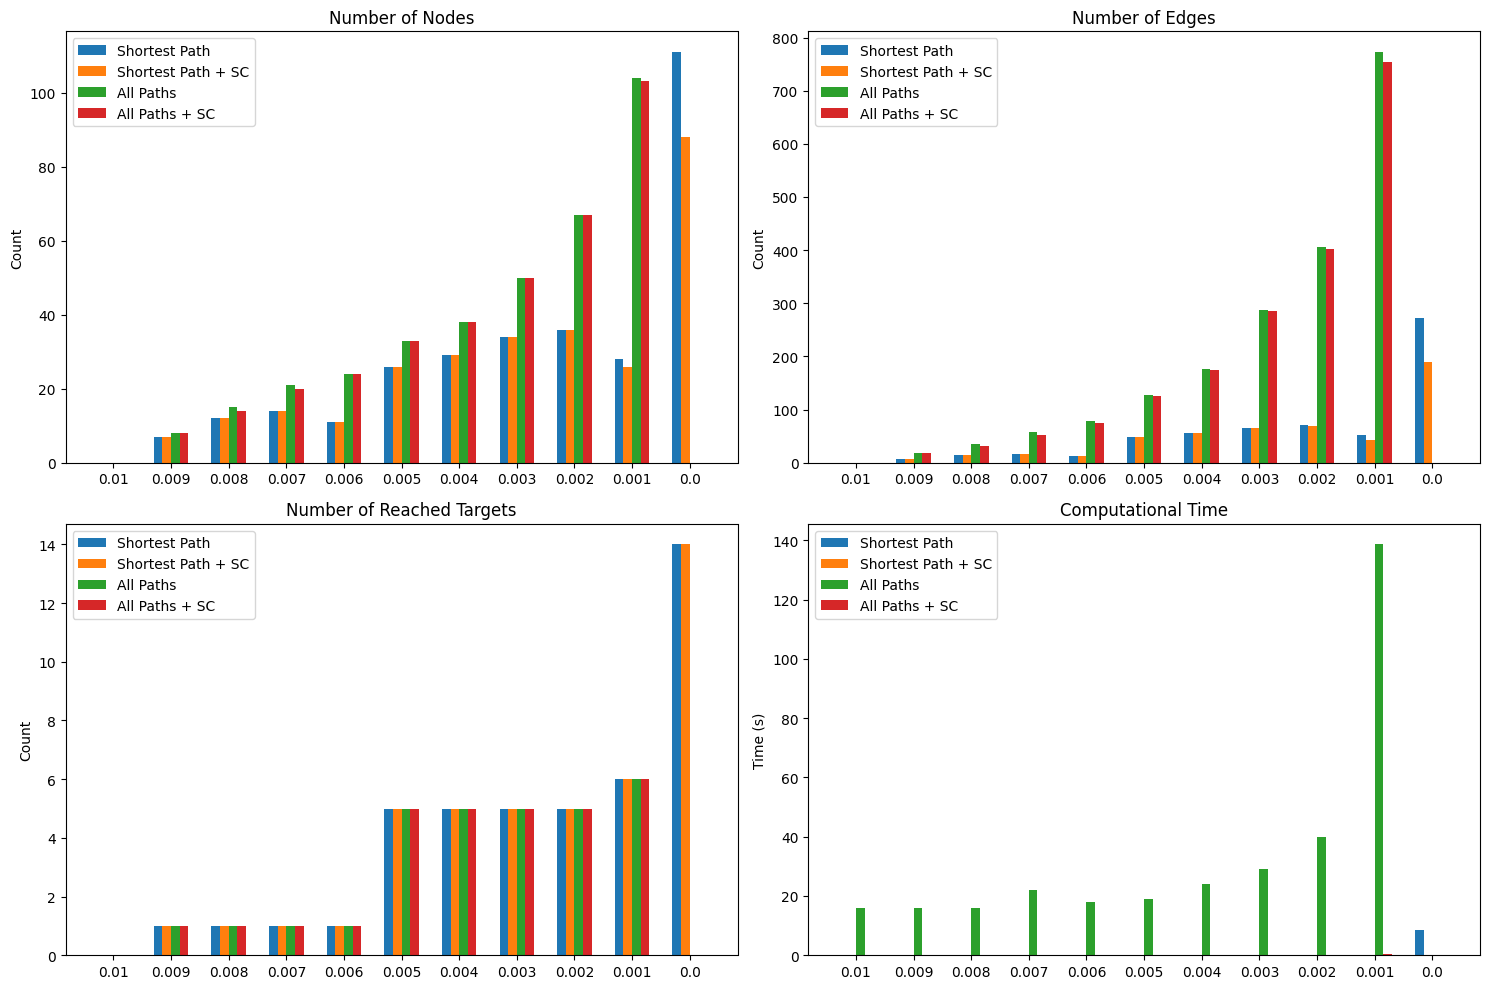

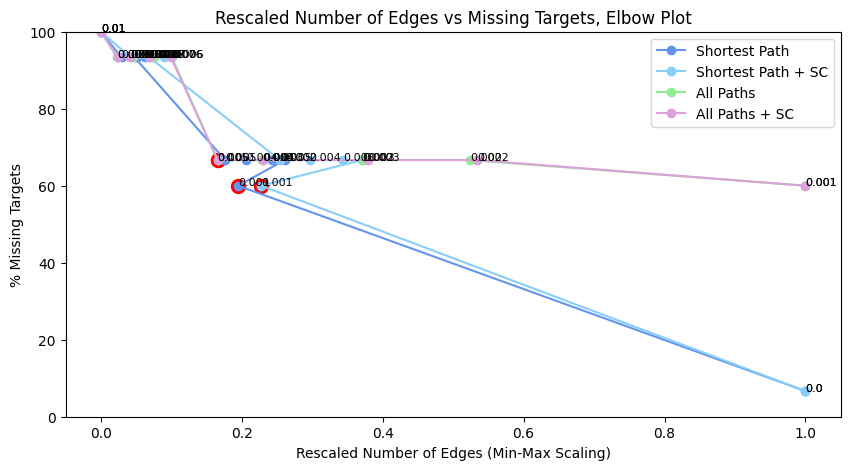

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

__pagerank_0.0__shortest v.s. __pagerank_0.0__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.274e-01 U_stat=4.135e+03
__pagerank_0.0__shortest__sc v.s. __pagerank_0.001__shortest: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.854e-10 U_stat=2.040e+02
__pagerank_0.001__shortest v.s. __pagerank_0.001__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.280e+02
__pagerank_0.001__shortest__sc v.s. __pagerank_0.005__reachability__allpaths: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.180e-01 U_stat=2.690e+02
__pagerank_0.005__reachability__allpaths v.s. __pagerank_0.005__reachability__allpaths__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=

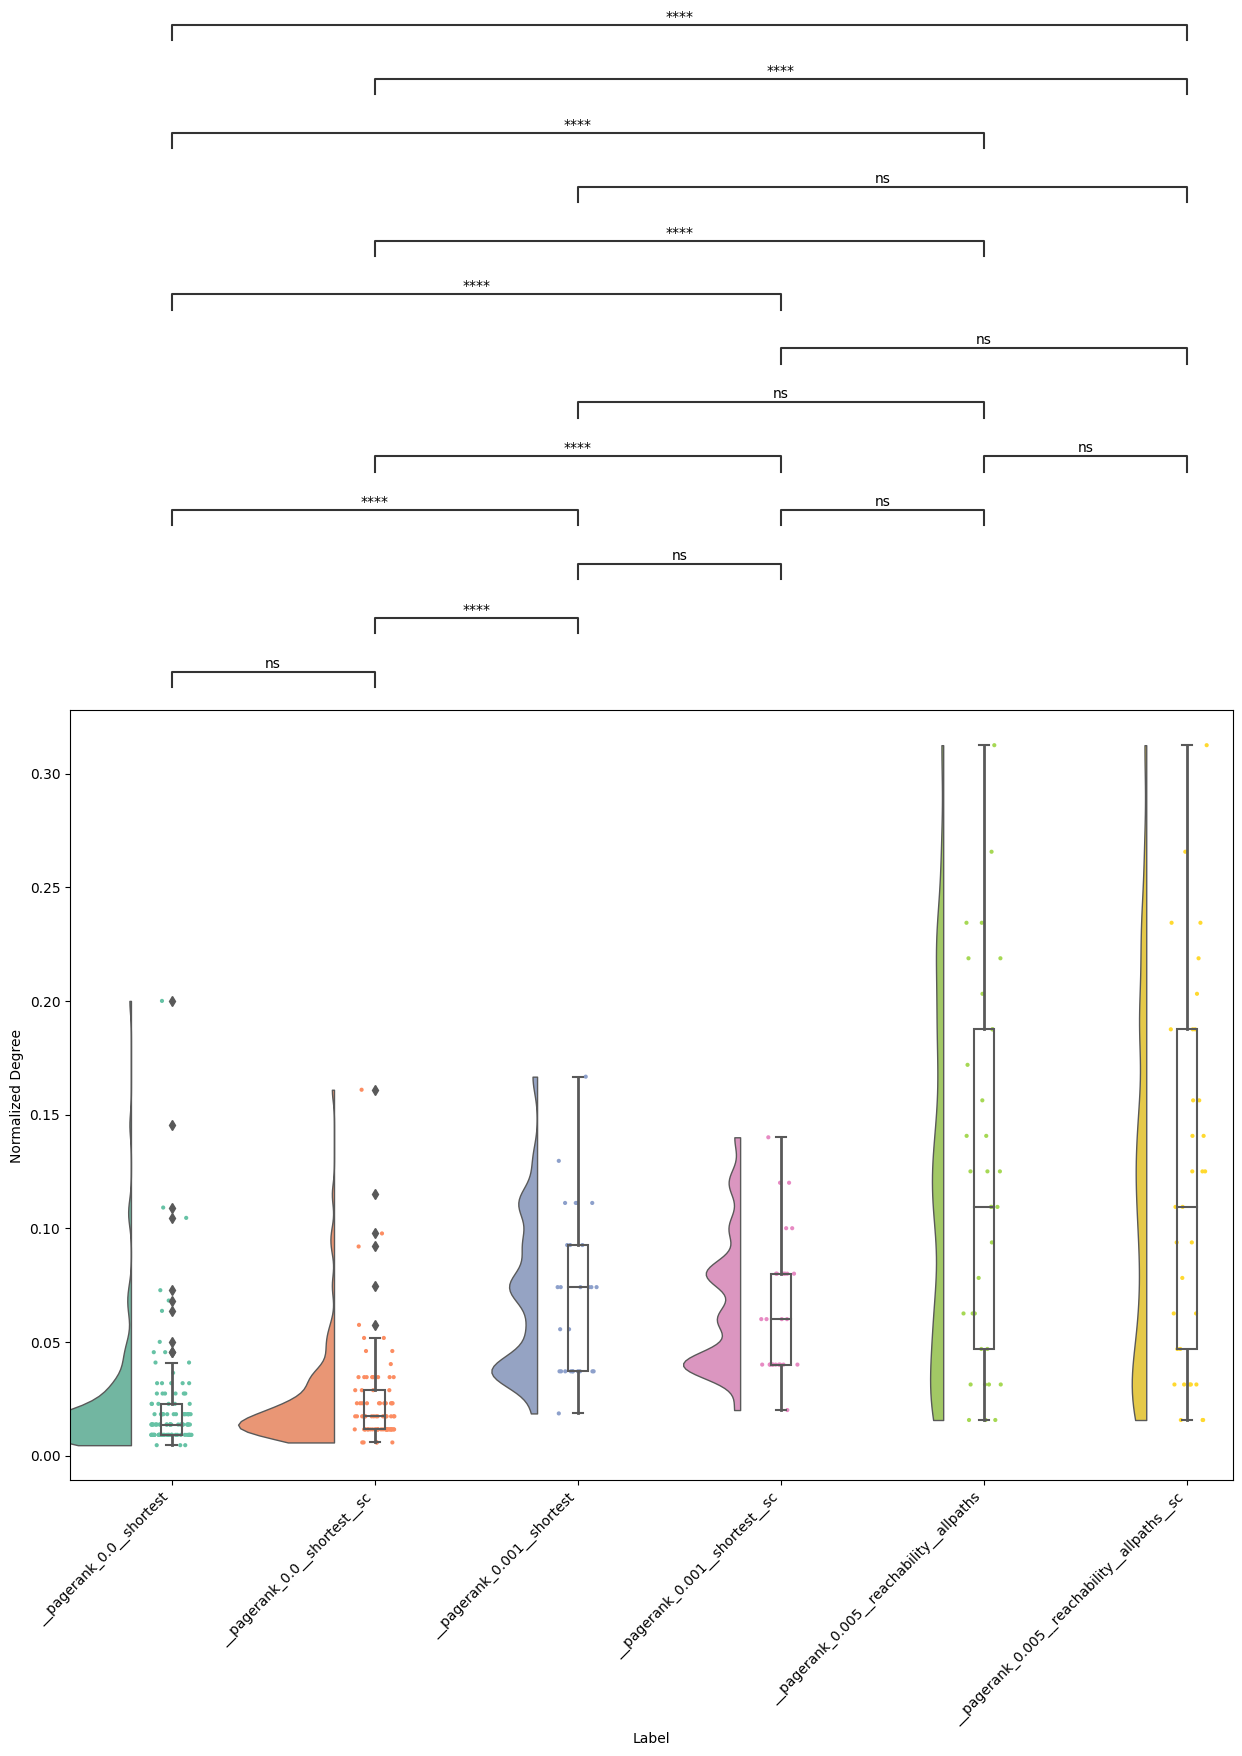

['trynska__real__reachability__pagerank_0.001__shortest.sif', 'trynska__real__reachability__pagerank_0.0__shortest__sc.sif', 'trynska__real__reachability__pagerank_0.0__shortest.sif', 'trynska__real__reachability__pagerank_0.005__reachability__allpaths__sc.sif', 'trynska__real__reachability__pagerank_0.001__shortest__sc.sif', 'trynska__real__reachability__pagerank_0.005__reachability__allpaths.sif']


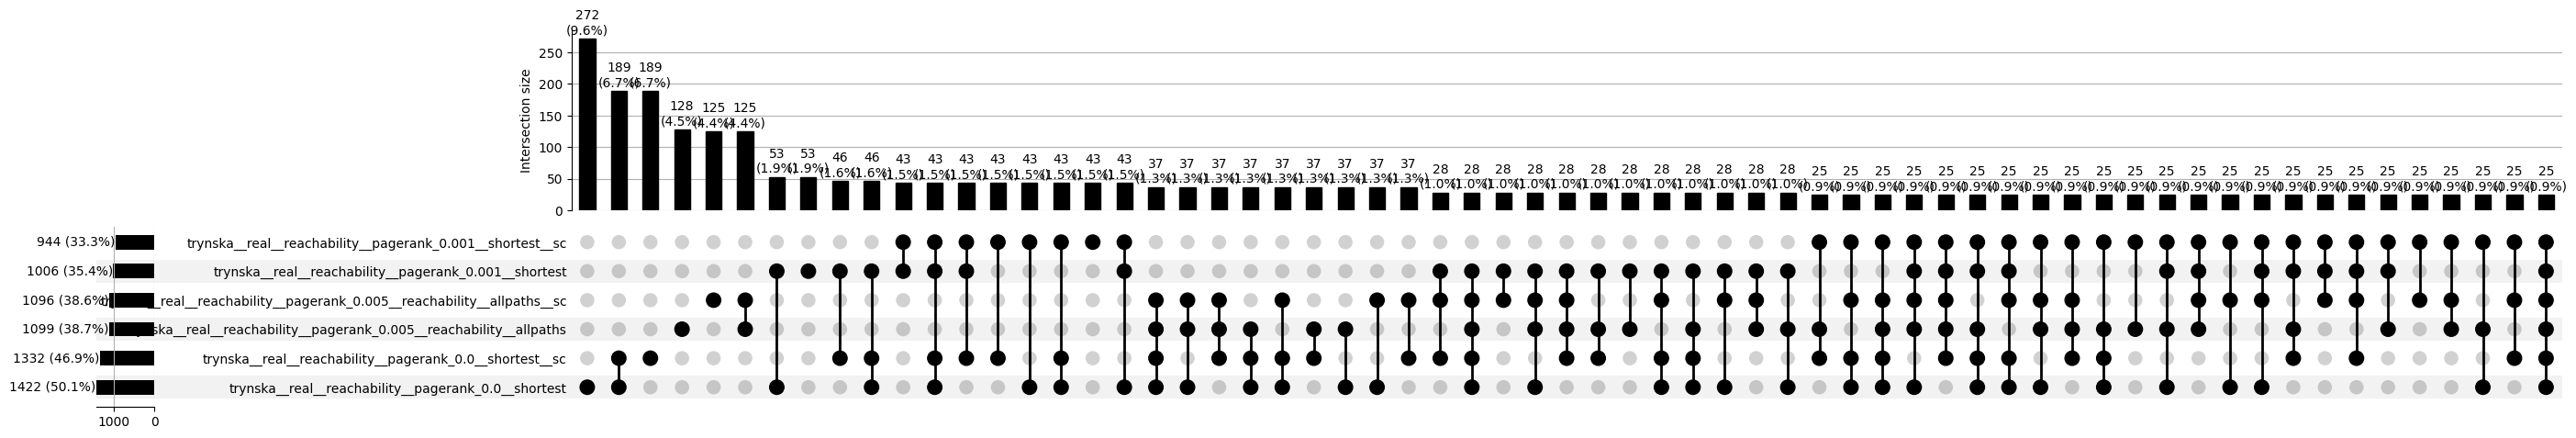

Computing random1 network
Computing path 1 with threshold 0.01
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.009
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.008
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.007
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.006
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.005
Computing path 1 with threshold 0.004
Compu

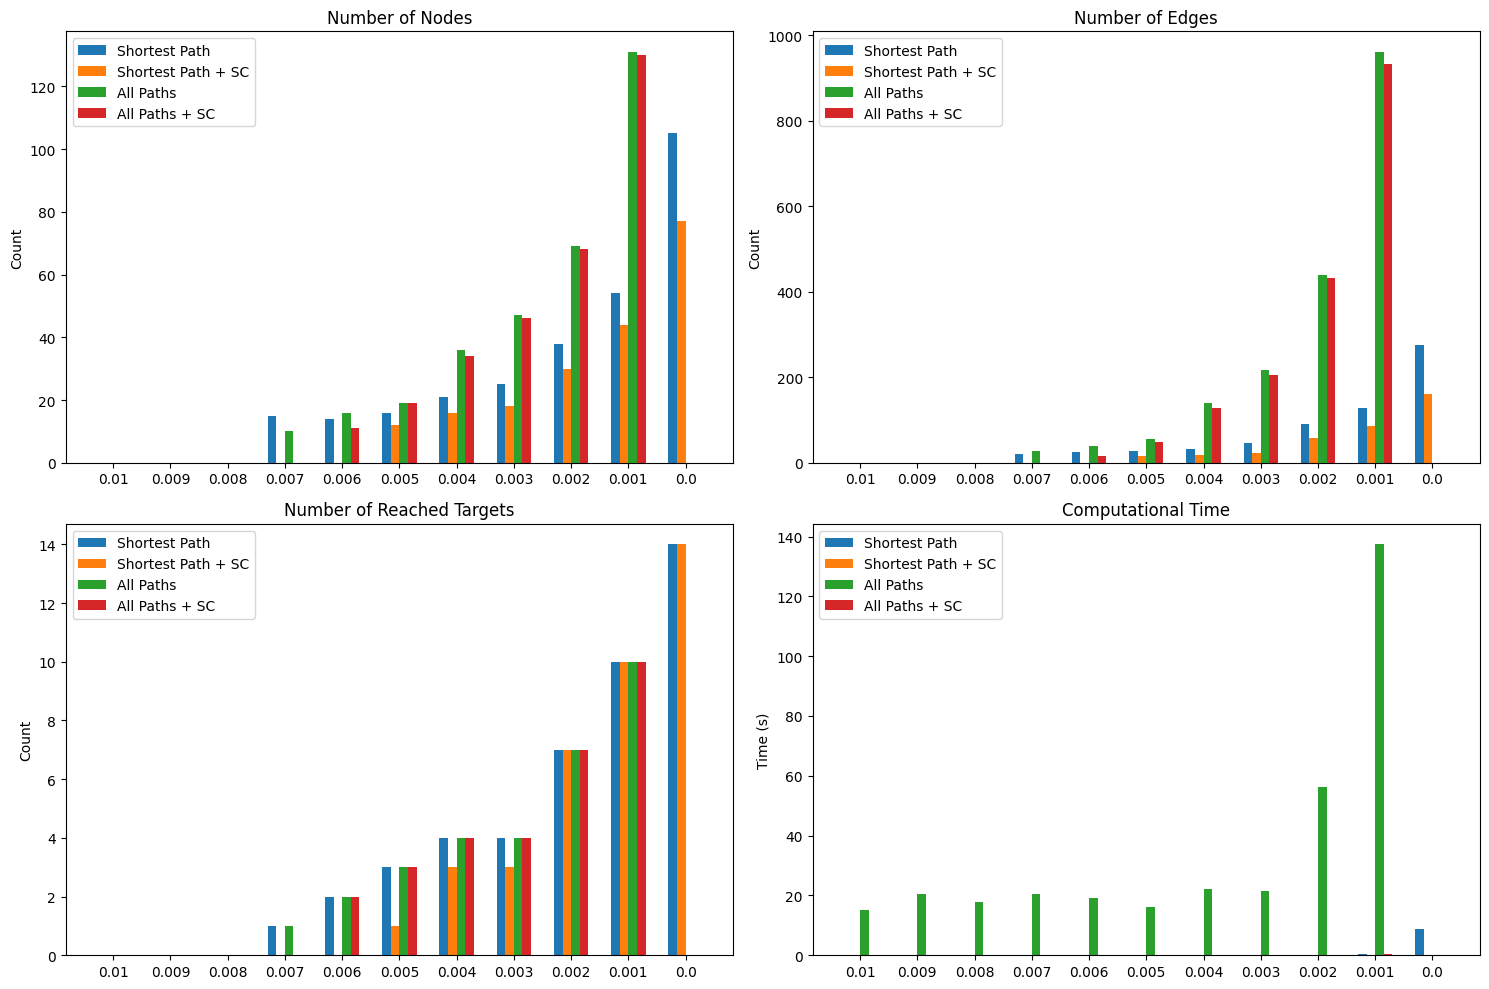

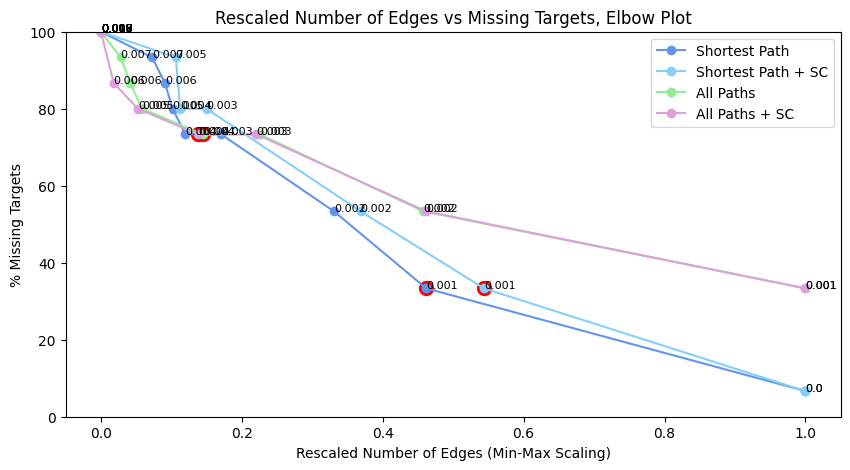

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

__pagerank_0.0__shortest v.s. __pagerank_0.0__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.445e+03
__pagerank_0.0__shortest__sc v.s. __pagerank_0.001__shortest: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.241e-02 U_stat=1.457e+03
__pagerank_0.001__shortest v.s. __pagerank_0.001__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.134e+03
__pagerank_0.001__shortest__sc v.s. __pagerank_0.004__reachability__allpaths: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.263e-04 U_stat=3.320e+02
__pagerank_0.004__reachability__allpaths v.s. __pagerank_0.004__reachability__allpaths__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=

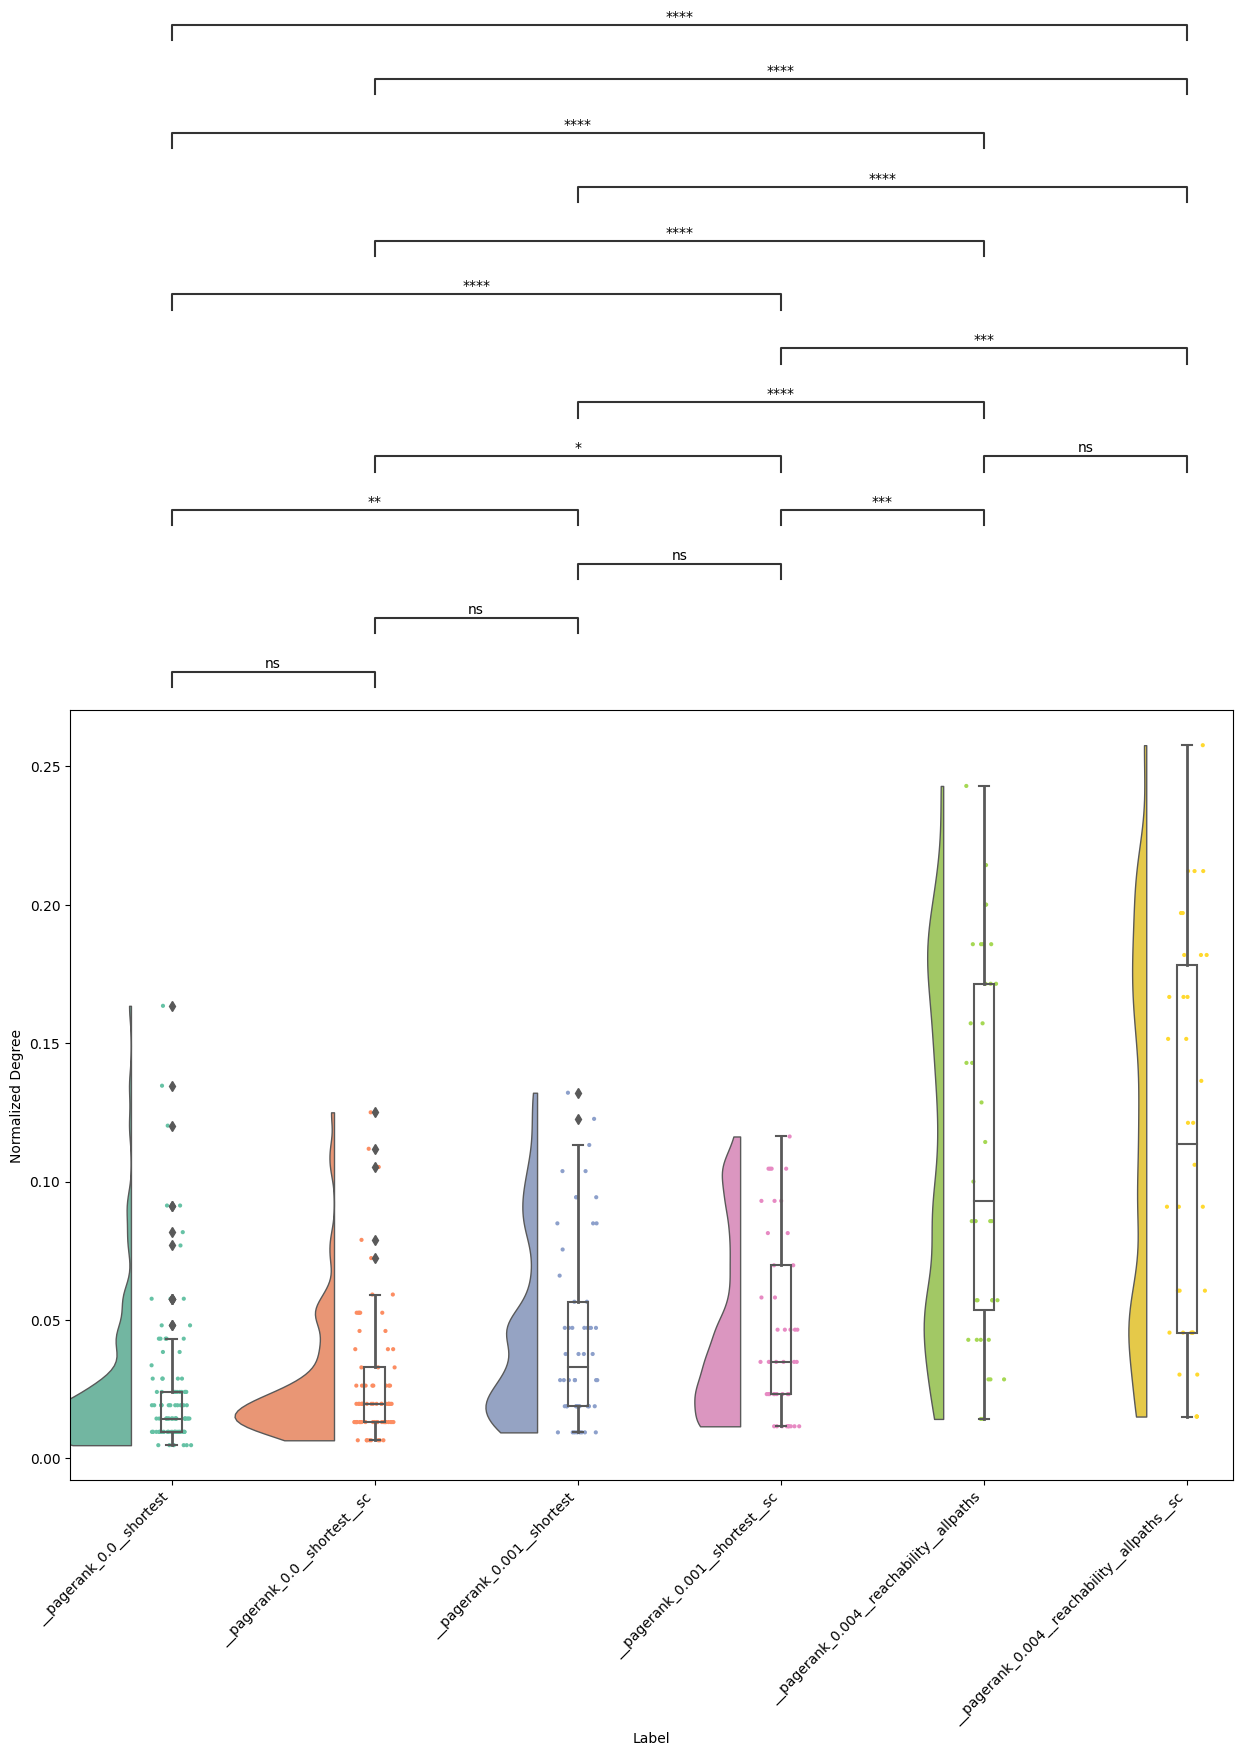

['trynska__random1__reachability__pagerank_0.001__shortest.sif', 'trynska__random1__reachability__pagerank_0.001__shortest__sc.sif', 'trynska__random1__reachability__pagerank_0.004__reachability__allpaths__sc.sif', 'trynska__random1__reachability__pagerank_0.004__reachability__allpaths.sif', 'trynska__random1__reachability__pagerank_0.0__shortest.sif', 'trynska__random1__reachability__pagerank_0.0__shortest__sc.sif']


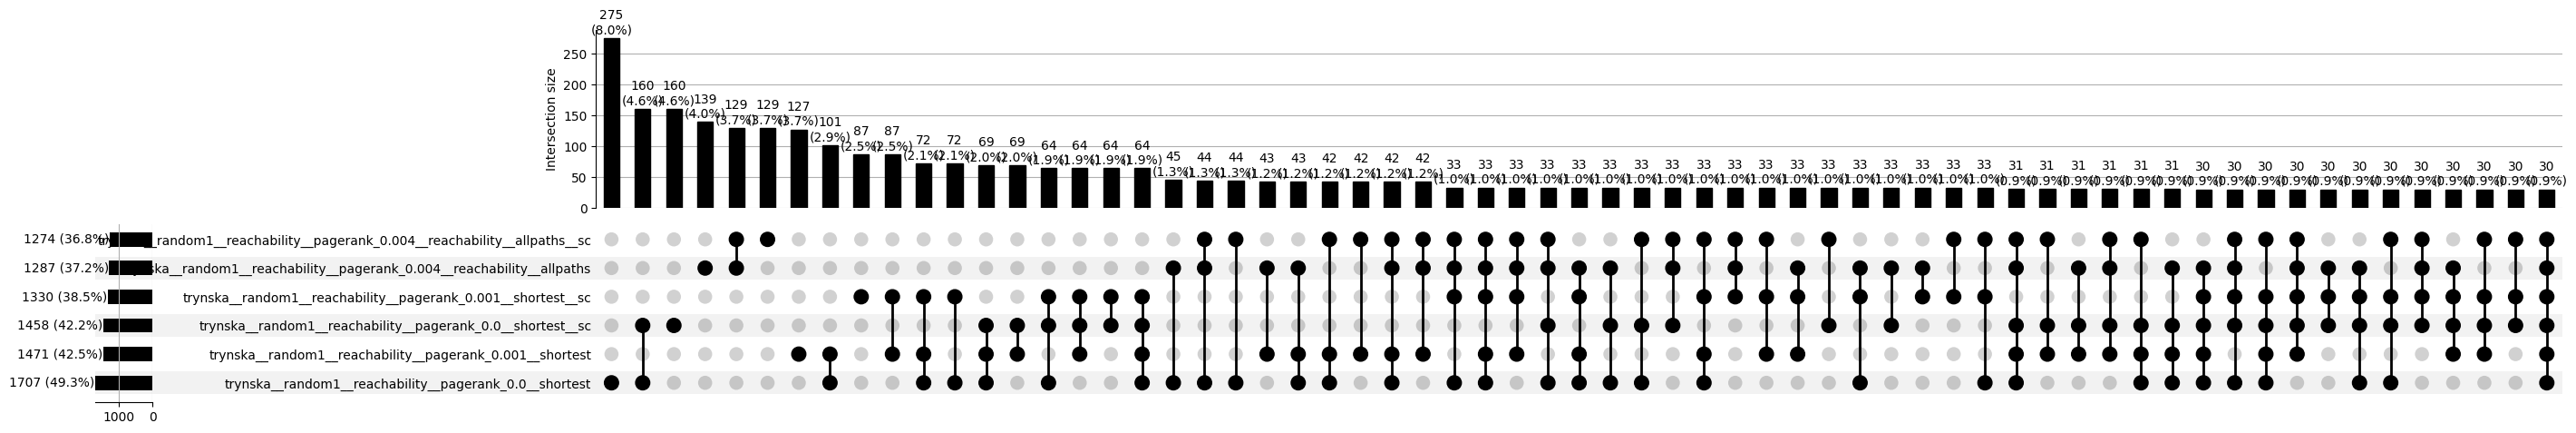

Computing random2 network
Computing path 1 with threshold 0.01
Computing path 1 with threshold 0.009
Computing path 1 with threshold 0.008
Computing path 1 with threshold 0.007
Computing path 1 with threshold 0.006
Computing path 1 with threshold 0.005
Computing path 1 with threshold 0.004
Computing path 1 with threshold 0.003
Computing path 1 with threshold 0.002
Computing path 1 with threshold 0.001
Computing path 1 with threshold 0.0
Computing path 2 with threshold 0.01
Computing path 2 with threshold 0.009
Computing path 2 with threshold 0.008
Computing path 2 with threshold 0.007
Computing path 2 with threshold 0.006
Computing path 2 with threshold 0.005
Computing path 2 with threshold 0.004
Computing path 2 with threshold 0.003
Computing path 2 with threshold 0.002
Computing path 2 with threshold 0.001
The graph is too large to visualize. It has 886 edges.
The graph is too large to visualize. It has 858 edges.


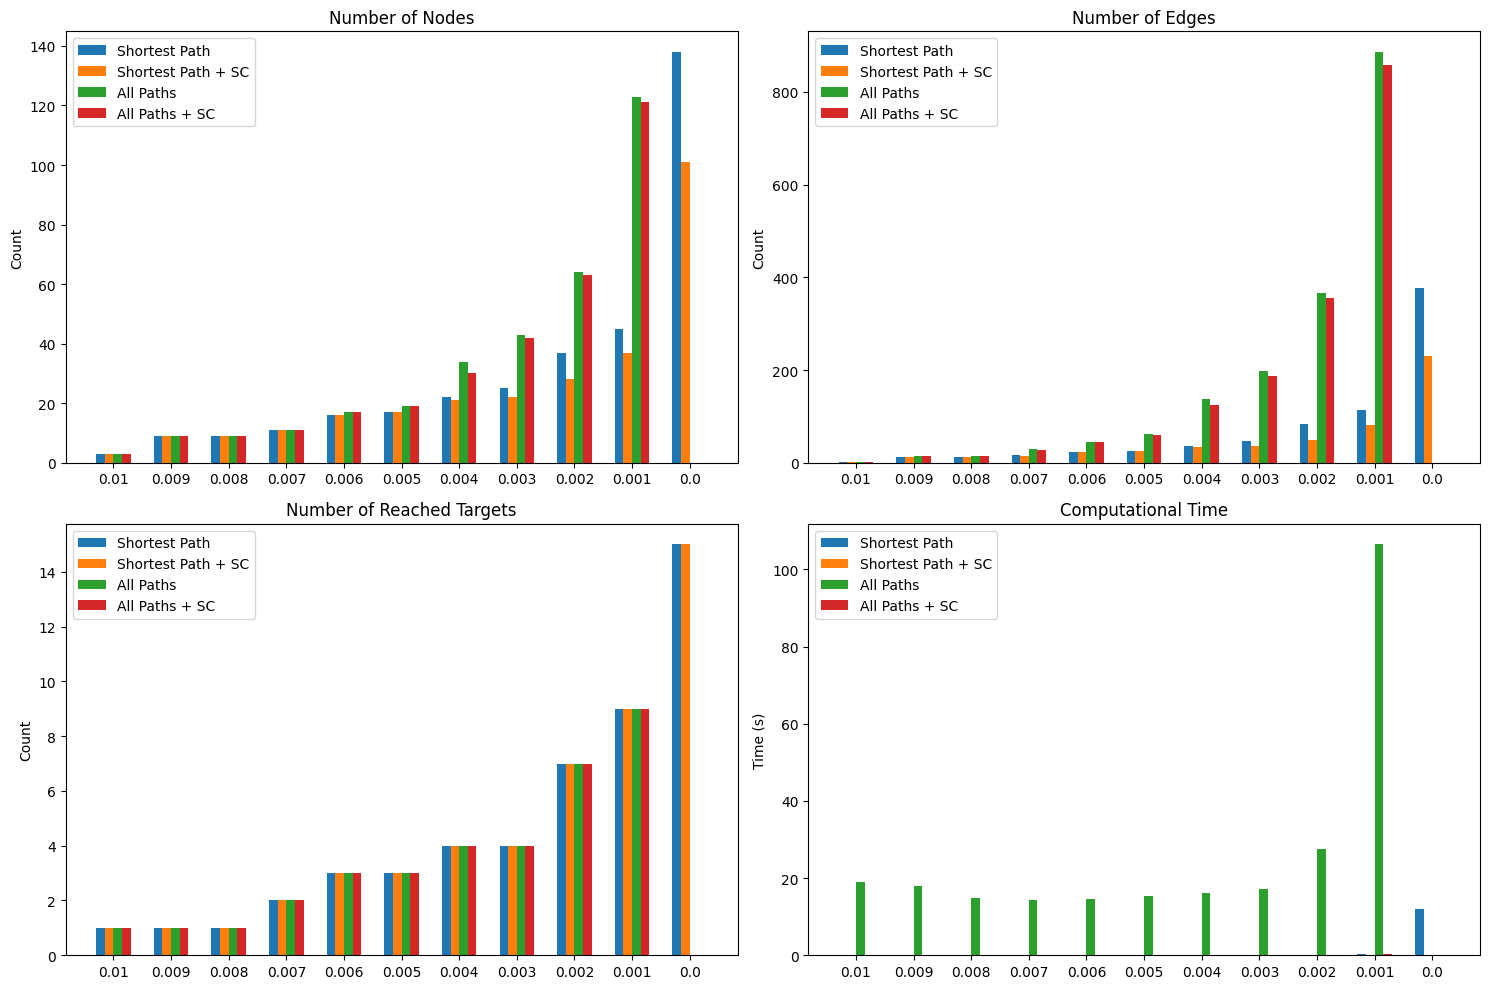

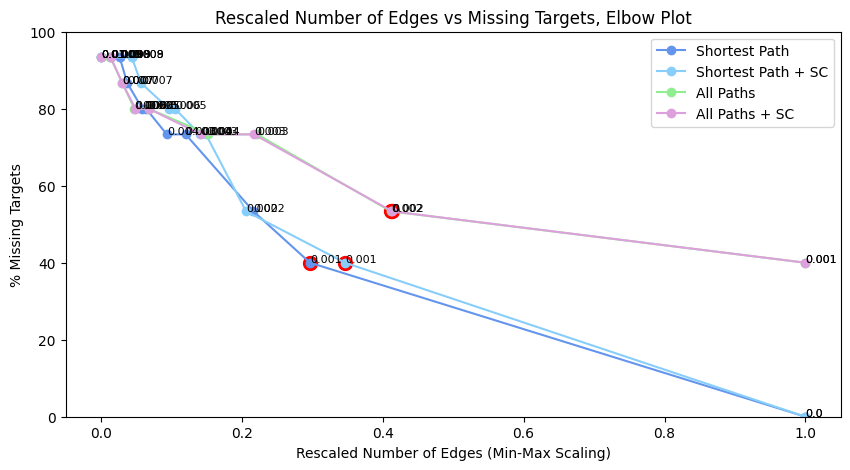

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

__pagerank_0.0__shortest v.s. __pagerank_0.0__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.830e-01 U_stat=5.799e+03
__pagerank_0.0__shortest__sc v.s. __pagerank_0.001__shortest: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.649e-09 U_stat=7.860e+02
__pagerank_0.001__shortest v.s. __pagerank_0.001__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.810e+02
__pagerank_0.001__shortest__sc v.s. __pagerank_0.002__reachability__allpaths: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.116e-01 U_stat=8.710e+02
__pagerank_0.002__reachability__allpaths v.s. __pagerank_0.002__reachability__allpaths__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=

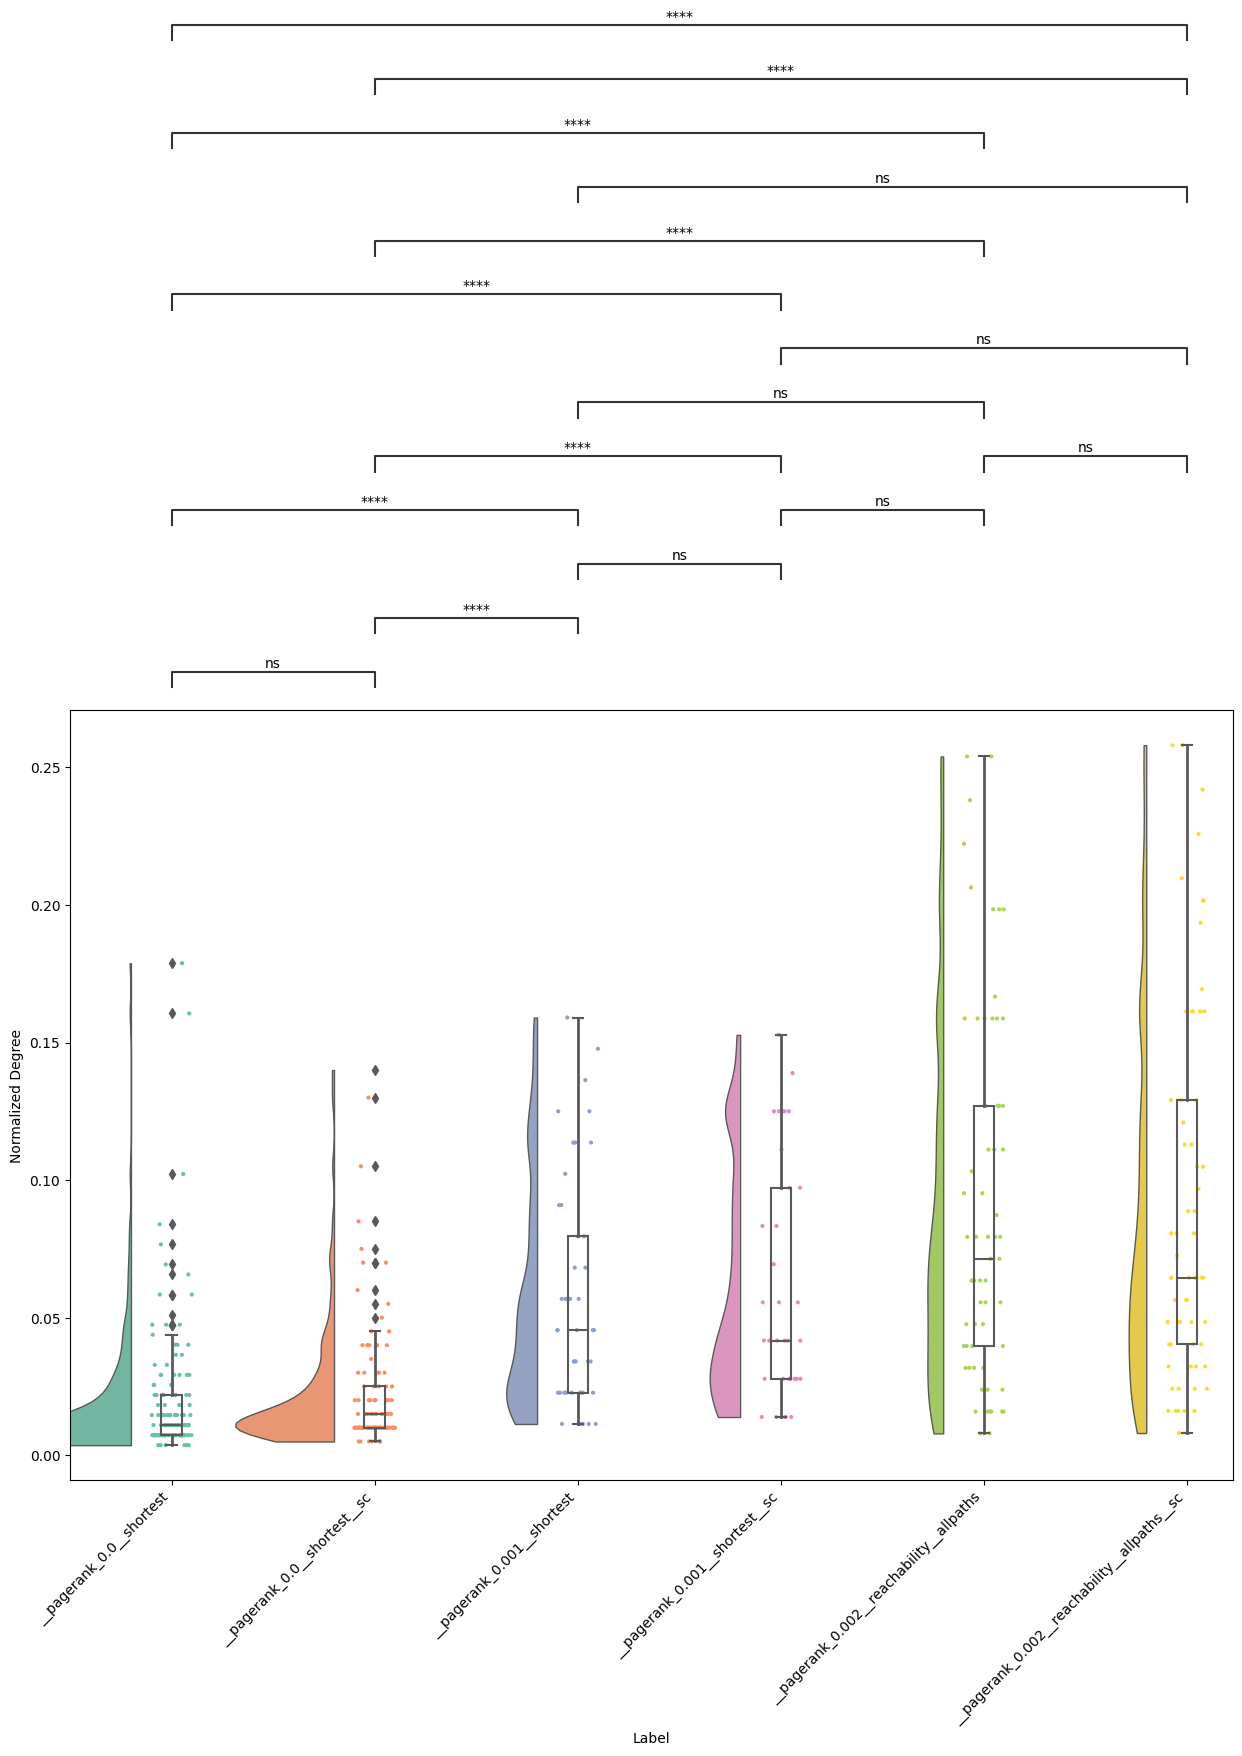

['trynska__random2__reachability__pagerank_0.001__shortest.sif', 'trynska__random2__reachability__pagerank_0.001__shortest__sc.sif', 'trynska__random2__reachability__pagerank_0.002__reachability__allpaths.sif', 'trynska__random2__reachability__pagerank_0.002__reachability__allpaths__sc.sif', 'trynska__random2__reachability__pagerank_0.0__shortest__sc.sif', 'trynska__random2__reachability__pagerank_0.0__shortest.sif']


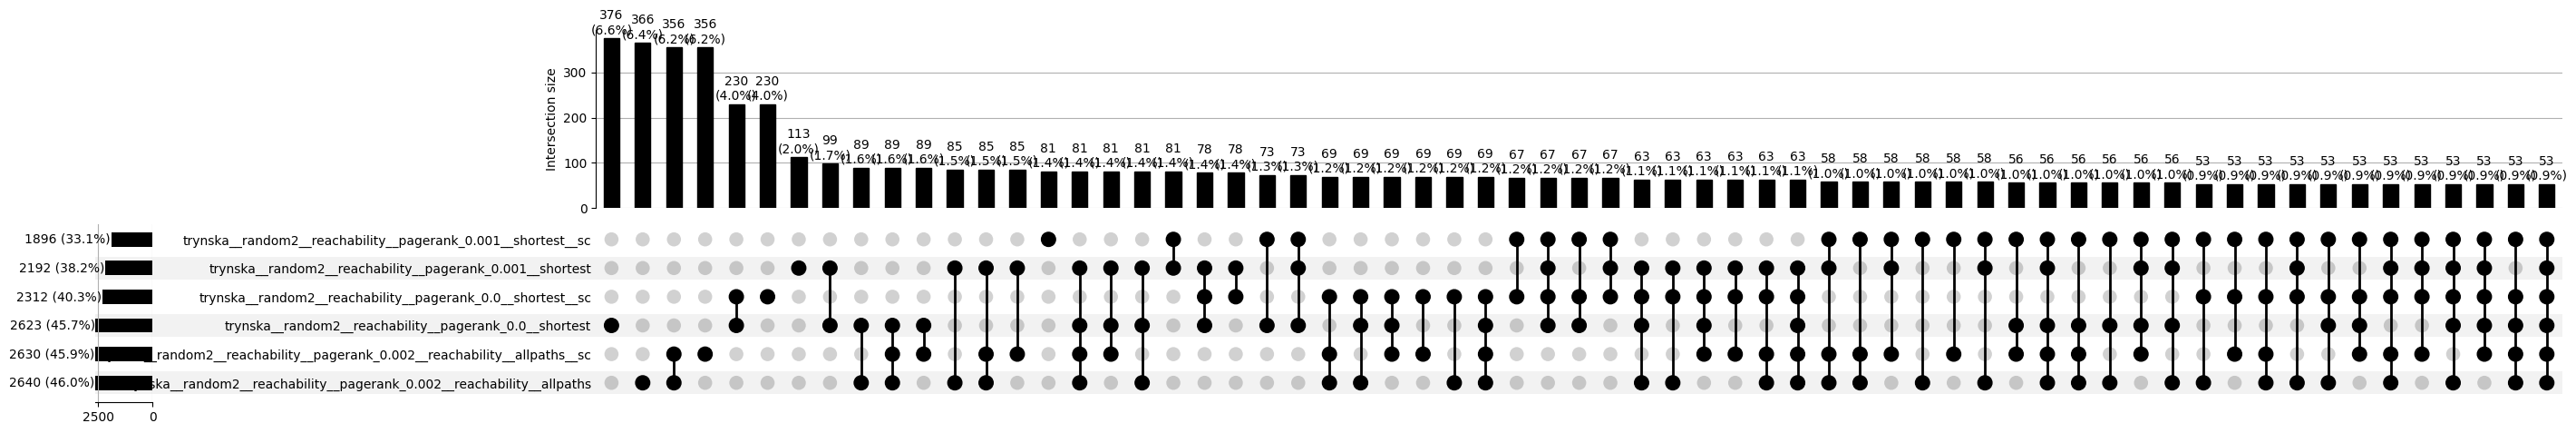

In [59]:
runs = ['real', 'random1', 'random2']

test_targets_dict = {}
for run in runs:
    print(f'Computing {run} network')
    if run == 'real':
        pass
    elif 'random' in run:
        random_target_names = random.sample(target_names,20)
        target_GEO = {random_target_names[i]: value for i, (old_key, value) in enumerate(target_GEO.items())}
    
    train_target, test_target = train_test_split(target_GEO, 5)

    test_targets_dict[run] = test_target

    G1P_solver = Solver(G, 'trynska')
    G1P_solver.source_dict = {'TGFB1': 1, 'TGFB2': 1, 'TGFB3': 1, 'IL2': 1}
    filtered_target_dict = {key: value for key, value in train_target.items() if key not in G1P_solver.source_dict.keys()}
    G1P_solver.target_dict = filtered_target_dict
    G1P_solver.network_batchrun(run, cutoff=6)

test_targets_df = pd.DataFrame.from_dict(test_targets_dict)

In [104]:
import pandas as pd
import os
import networkx as nx
import ptitprince as pt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

class Eval:
    def __init__(self, G, dirpath, study_id):
        self.dirpath = dirpath
        self.G = G
        self.study_id = study_id
        self.tests_dict = self.get_test_dict()
        self.graphs, self.metadata_df = self.parse_sif_files()
        self.distance_df = None

    def get_datafiles(self):
        files_list = os.listdir(self.dirpath)
        sif_files = [os.path.join(self.dirpath, f) for f in files_list if (f.endswith('.sif') and (self.study_id in f))]
        return sif_files
    
    def get_test_dict(self):
        filename = f'./{self.study_id}__testtargets.csv'
        try:
            df = pd.read_csv(filename, index_col=0)
            data_dict = df.to_dict()
            for key in data_dict:
                data_dict[key] = {k: v for k, v in data_dict[key].items() if pd.notna(v)}
            
            return data_dict
        
        except FileNotFoundError:
            
            return f"File {filename} not found."

    def parse_sif_files(self):
        """
        Parse a list of SIF files, return a dictionary of networkx graphs, and extract metadata with ordered methods.
        
        Parameters:
        - file_paths (list): List of paths to the SIF files.
        
        Returns:
        - dict: Dictionary where keys are filenames (without .sif extension) and values are networkx graphs.
        - DataFrame: Metadata dataframe with study ID, methods, pagerank threshold, and original graph ID columns.
        """
        graphs = {}
        
        # Lists to store the metadata
        graph_ids = []
        study_ids = []
        iter_ids = []
        methods_list = []
        pagerank_thresholds = []

        file_paths = self.get_datafiles()
        
        for file_path in file_paths:
            # Extract the filename without the .sif extension
            graph_id = file_path.split('/')[-1].replace('.sif', '')
            
            # Store the original graph ID
            graph_ids.append(graph_id)
            
            # Initialize a directed graph
            G = nx.DiGraph()
            
            # Parse the SIF file, skipping the header
            with open(file_path, 'r') as f:
                lines = f.readlines()[1:]  # skip the header
                for line in lines:
                    parts = line.strip().split('\t')
                    if len(parts) == 3:
                        source, interaction, target = parts
                        interaction = 1 if interaction == 'P' else (-1 if interaction == 'N' else interaction)
                        G.add_edge(source, target, interaction=interaction)
            
            # Store the graph in the dictionary
            graphs[graph_id] = G
            
            # Metadata extraction
            parts = graph_id.split('__')
            study_ids.append(parts[0])
            iter_ids.append(parts[1])
            
            method_parts = parts[2:]
            pagerank_value = None
            for idx, part in enumerate(method_parts):
                if "pagerank" in part:
                    pagerank_value = float(part.split('_')[-1])  # Extract float value after "pagerank_"
                    method_parts[idx] = "pagerank"  # Replace with "pagerank" string
            
            pagerank_thresholds.append(pagerank_value)
            methods_list.append(', '.join(method_parts))
        
        # Create the metadata dataframe
        metadata_df = pd.DataFrame({
            'Graph ID': graph_ids,
            'Study ID': study_ids,
            'Targets': iter_ids,
            'Methods': methods_list,
            'Pagerank Threshold': pagerank_thresholds
        })
        
        return graphs, metadata_df
    

    def distance_calc(self):
        distances = []
        test_nodes = []
        network_nodes = []
        graph_ids = []
        run_ids = []
        undirG = self.G.reverse()
        for graph in self.graphs:
            run = graph.strip().split('__')[1]
            nodes_subnetwork = [node for node in self.graphs[graph].nodes]
            for node in nodes_subnetwork:
                for test_node in self.tests_dict[run]:
                    try:
                        distance = nx.shortest_path_length(undirG, source=test_node, target=node)
                    except nx.NetworkXNoPath:
                        distance = np.Inf
                    distances.append(distance)
                    test_nodes.append(test_node)
                    network_nodes.append(node)
                    graph_ids.append(graph)
                    run_ids.append(run)
        
        self.distance_df = pd.DataFrame({
            'Graph ID': graph_ids,
            'Run ID': run_ids,
            'Study ID': self.study_id,
            'Test nodes': test_nodes,
            'Network nodes': network_nodes,
            'Distances': distances
        })

        self.plot_distance(self.distance_df)
        
        return self.distance_df
    
    def plot_distance(self, distances_df):
        distances_df["Pagerank Thresholds"] = distances_df["Graph ID"].apply(lambda x: x.split("__")[3].split('_')[1])
        distances_df["Main Method"] = distances_df["Graph ID"].apply(lambda x: x.split("__")[4:]).str.cat(sep=', ')
        print(distances_df["Main Method"])
        plt.figure(figsize=(15, 10))
        
        # Creating a color palette for pagerank thresholds
        unique_thresholds = distances_df["Pagerank Thresholds"].unique()
        color_palette = dict(zip(unique_thresholds, sns.color_palette("rainbow", len(unique_thresholds))))
        
        # Boxplot
        sns.boxplot(data=distances_df, x="Graph ID", y="Distances", hue="Pagerank Thresholds", palette=color_palette, dodge=True)
        
        # Adjusting the plot aesthetics
        plt.xticks(rotation=45)
        plt.legend(title="Pagerank Threshold", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.tight_layout()
        
        plt.show()

SyntaxError: invalid syntax (4011938166.py, line 146)

In [102]:
G1P_eval = Eval(G, './results/', 'trynska')
G1P_eval.tests_dict = test_targets_dict

In [103]:
G1P_eval.distance_calc()

AttributeError: Can only use .cat accessor with a 'category' dtype

### Comments

In the first plot, we see that the number of connected targets when using the all_paths approach actually peak at a lower % than when using the shortest_path approach. This is due to the extra constrain added by the cutoff value in the all paths option. When setting low cutoff values, many of the targets are actually not reachable when using less edges than the cutoff value. However, this constrain is not present in the second path, thus showing better performance. When looking at the orange line (size of network in all paths option) we see that incorporating more nodes via lowering the pagerank threshold does not actually help in connecting more targets. Probably what we are facing here is a depth problem: widening the network does not help because the targets are in a level deeper than the one we can reach. Further steps would be testing higher cutoffs, but the computational time explodes. Maybe in the cluster it's faster, will try this in subsequent iterations. 

# GSE106159

The goals of this study are to compare the U87 cell xenograft GBM mice (U87 cell line) to TWIST1 knock out U87 cell xenograft GBM mice (TWIST1 knock out U87 cell line) using their transcriptomes. 

TWIST1 (TW) is a bHLH transcription factor (TF) and master regulator of the epithelial‐to‐mesenchymal transition (EMT). In vitro, TW promotes mesenchymal change, invasion, and self‐renewal in glioblastoma (GBM) cells. However, the potential therapeutic relevance of TW has not been established through loss‐of‐function studies in human GBM cell xenograft models. The effects of TW loss of function (gene editing and knockdown) on inhibition of tumorigenicity of U87MG and GBM4 glioma stem cells were tested in orthotopic xenograft models and conditional knockdown in established flank xenograft tumors. RNAseq and the analysis of tumors investigated putative TW‐associated mechanisms. Multiple bioinformatic tools revealed significant alteration of ECM, membrane receptors, signaling transduction kinases, and cytoskeleton dynamics leading to identification of PI3K/AKT signaling. We experimentally show alteration of AKT activity and periostin (POSTN) expression in vivo and/or in vitro. For the first time, we show that effect of TW knockout inhibits AKT activity in U87MG cells in vivo independent of PTEN mutation. The clinical relevance of TW and candidate mechanisms was established by analysis of the TCGA and ENCODE databases. TW expression was associated with decreased patient survival and LASSO regression analysis identified POSTN as one of top targets of TW in human GBM. While we previously demonstrated the role of TW in promoting EMT and invasion of glioma cells, these studies provide direct experimental evidence supporting protumorigenic role of TW independent of invasion in vivo and the therapeutic relevance of targeting TW in human GBM. Further, the role of TW driving POSTN expression and AKT signaling suggests actionable targets, which could be leveraged to mitigate the oncogenic effects of TW in GBM.

In [3]:
# Load dataset
gex_GEO = pd.read_csv('GSE106159-expression.txt', sep='\t', index_col=0)
meta_GEO = pd.read_csv('GSE106159-metadata.txt', sep='\t', index_col=0)

# Preview expression data
gex_GEO.head()

GSM2830596  GSM2830597  GSM2830598  GSM2830599  GSM2830600  \
gene_symbol                                                               
A1BG                 24          15          11          29          23   
A1CF                  6           6           7          10          14   
A2M                 112         129         115         166         156   
A2ML1                14           6           4          10           4   
A2MP1                 0           0           0           1           0   

             GSM2830601  GSM2830602  GSM2830603  GSM2830604  GSM2830605  ...  \
gene_symbol                                                              ...   
A1BG                 19          39          65          58          47  ...   
A1CF                 11           3           7          14           4  ...   
A2M                 232         218           7           8          10  ...   
A2ML1                 8          10          19          12           9  ...   
A2MP1                 0           1           1           0           0  ...   

             GSM2830609  GSM2830610  GSM2830611  GSM2830612  GSM2830613  \
gene_symbol                                                               
A1BG                 49          44          26          38          26   
A1CF                  6          14          13          18           8   
A2M                   1           3           0           1           0   
A2ML1                 9          16          17          13          15   
A2MP1                 1           0           0           3           1   

             GSM2830614  GSM2830615  GSM2830616  GSM2830617  GSM2830618  
gene_symbol                                                              
A1BG                 38          46          29          44          46  
A1CF                 20          21          23          22          24  
A2M                   0           0           0           4           1  
A2ML1                20          22           9          13          18  
A2MP1                 2           1           2           1           1  

[5 rows x 23 columns]

In [4]:
meta_GEO.head()

Sample Title     genotype tissue
Sample_geo_accession                                           
GSM2830596            U87_tumor_TW_676_rep1  TWIST1 Wild  Brain
GSM2830597            U87_tumor_TW_677_rep1  TWIST1 Wild  Brain
GSM2830598            U87_tumor_TW_677_rep2  TWIST1 Wild  Brain
GSM2830599            U87_tumor_TW_679_rep1  TWIST1 Wild  Brain
GSM2830600            U87_tumor_TW_679_rep2  TWIST1 Wild  Brain

In [5]:
# pandas2ri.activate()

# base = importr('base')
# stats = importr('stats')
# DESeq2 = importr('DESeq2')

# import pandas as pd

# col_data = meta_GEO[['genotype']]
# col_data['genotype'] = stats.relevel(robjects.FactorVector(col_data['genotype']), ref="TWIST1 Wild")

# dds = DESeq2.DESeqDataSetFromMatrix(countData=gex_GEO, colData=col_data, design=robjects.Formula("~ genotype"))

# dds = DESeq2.DESeq(dds)

# res = DESeq2.results(dds)

# res_df = robjects.r['as.data.frame'](res)
# res_df_pandas = robjects.conversion.rpy2py(res_df)

# de_GEO = res_df_pandas.sort_values(by='stat', ascending=False, key=lambda col: col.abs())

# de_GEO.to_csv('GSE106159_de.csv', sep='\t', index=True)

# de_GEO

In [7]:
de_GEO = pd.read_csv('GSE106159_de.csv', sep='\t', index_col=0)
de_GEO

baseMean  log2FoldChange     lfcSE       stat         pvalue  \
MAGEA6    320.473919       -8.499931  0.304161 -27.945474  7.482433e-172   
MAGEA1    519.461428       -9.616276  0.348760 -27.572744  2.362408e-167   
CD33       97.587967       -3.863992  0.178690 -21.623990  1.068292e-103   
NAXD      662.275231        1.193964  0.058426  20.435620   8.066174e-93   
PDE10A    190.518468       -1.794220  0.088274 -20.325562   7.640894e-92   
...              ...             ...       ...        ...            ...   
ZNRF4       0.000000             NaN       NaN        NaN            NaN   
ZSCAN1      0.000000             NaN       NaN        NaN            NaN   
ZSWIM5P2    0.000000             NaN       NaN        NaN            NaN   
ZYG11AP1    0.000000             NaN       NaN        NaN            NaN   
ZYXP1       0.000000             NaN       NaN        NaN            NaN   

                   padj  
MAGEA6    1.636333e-167  
MAGEA1    2.583175e-163  
CD33      7.787495e-100  
NAXD       4.409979e-89  
PDE10A     3.341974e-88  
...                 ...  
ZNRF4               NaN  
ZSCAN1              NaN  
ZSWIM5P2            NaN  
ZYG11AP1            NaN  
ZYXP1               NaN  

[35238 rows x 6 columns]

In [8]:
nodes_network = [f for f in G.nodes]

In [9]:
filtered_de_GEO = de_GEO[de_GEO.index.isin(nodes_network)]

In [10]:
target_names = filtered_de_GEO.index.tolist()

In [12]:
len(target_names)

8350

In [10]:
de_GEO_subset = filtered_de_GEO.head(100)

In [11]:
targetsdf_GEO = de_GEO_subset[['stat']]

targetsdf_GEO['stat'] = np.where(targetsdf_GEO['stat'] > 0, 1, np.where(targetsdf_GEO['stat'] < 0, -1, targetsdf_GEO['stat']))

target_GEO = targetsdf_GEO['stat'].to_dict()

/tmp/ipykernel_10530/2947898986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targetsdf_GEO['stat'] = np.where(targetsdf_GEO['stat'] > 0, 1, np.where(targetsdf_GEO['stat'] < 0, -1, targetsdf_GEO['stat']))


In [12]:
def train_test_split(target_dict, n=10):
    test_keys = random.sample(list(target_dict.keys()), n)
    train_keys = [f for f in list(target_dict.keys()) if f not in test_keys]
    train_keys

    train_dict = {key: target_dict[key] for key in train_keys}
    test_dict = {key: target_dict[key] for key in test_keys}
    
    return train_dict, test_dict

Computing real network
Computing path 1 with threshold 0.01
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.009
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.008
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.007
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.006
Computing path 1 with threshold 0.005
Computing path 1 with threshold 0.004
Computin

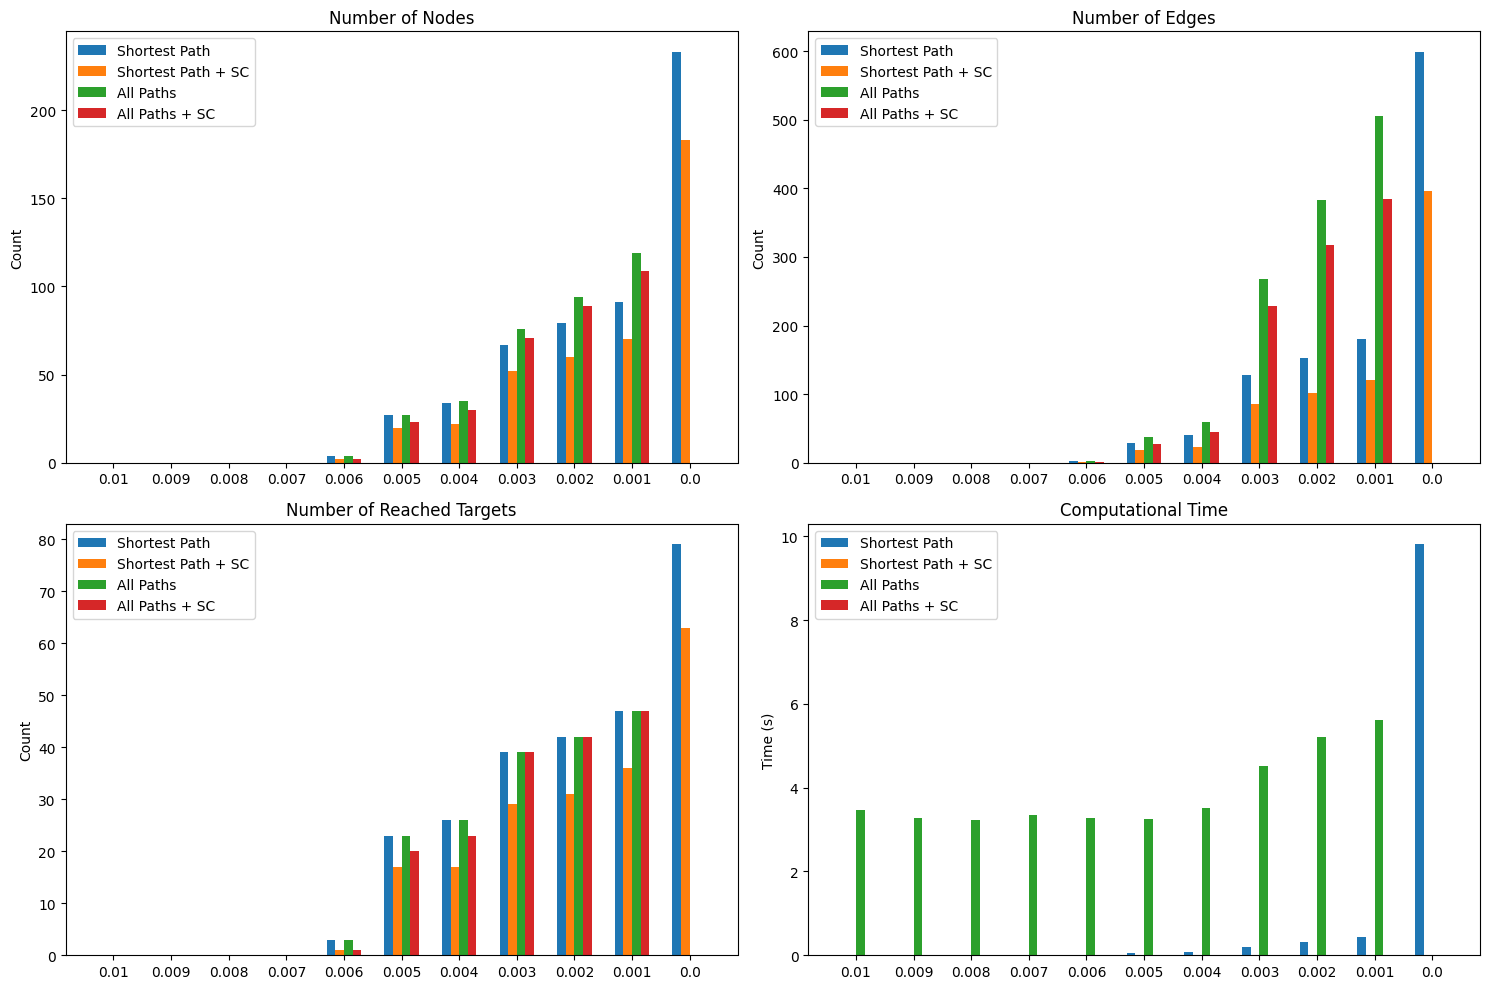

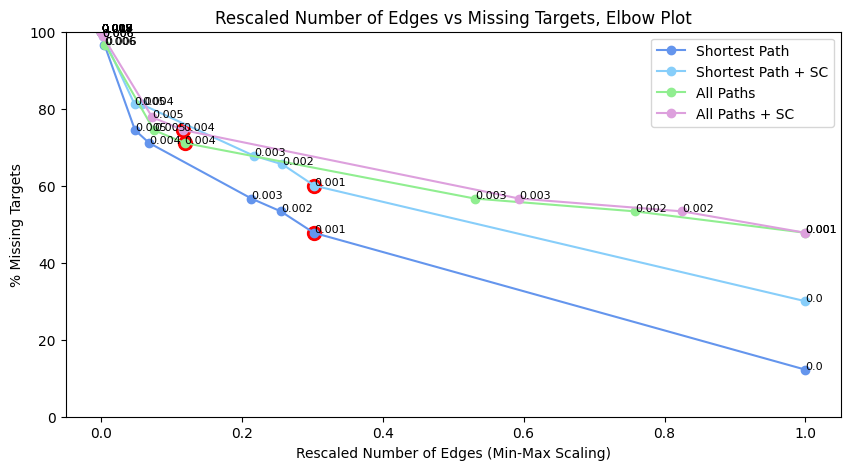

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

__pagerank_0.0__shortest v.s. __pagerank_0.0__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.841e-01 U_stat=1.848e+04
__pagerank_0.0__shortest__sc v.s. __pagerank_0.001__shortest: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.628e-08 U_stat=4.633e+03
__pagerank_0.001__shortest v.s. __pagerank_0.001__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.250e-01 U_stat=2.592e+03
__pagerank_0.001__shortest__sc v.s. __pagerank_0.004__reachability__allpaths: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.365e-05 U_stat=5.560e+02
__pagerank_0.004__reachability__allpaths v.s. __pagerank_0.004__reachability__allpaths__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=

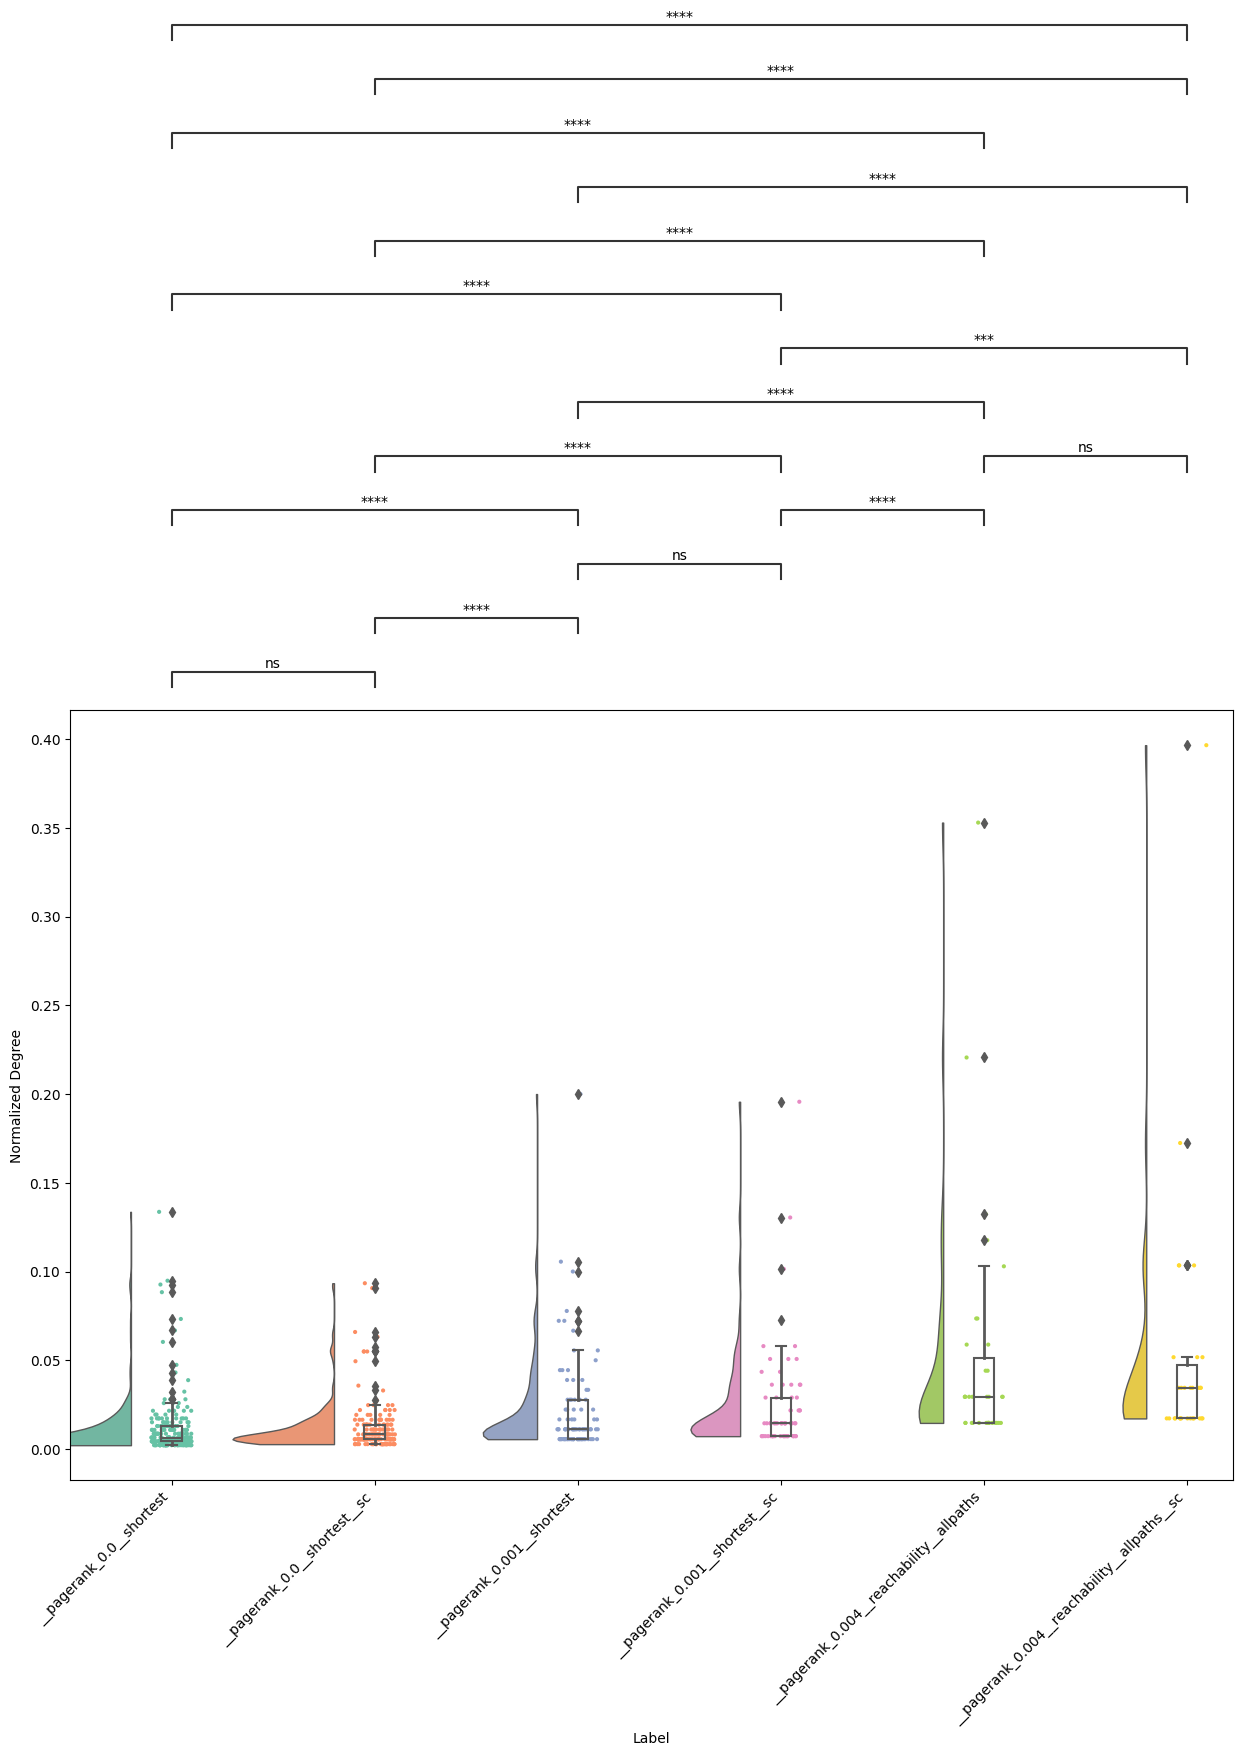

['GSE106159__real__reachability__pagerank_0.0__shortest.sif', 'GSE106159__real__reachability__pagerank_0.004__reachability__allpaths__sc.sif', 'GSE106159__real__reachability__pagerank_0.001__shortest.sif', 'GSE106159__real__reachability__pagerank_0.004__reachability__allpaths.sif', 'GSE106159__real__reachability__pagerank_0.001__shortest__sc.sif', 'GSE106159__real__reachability__pagerank_0.0__shortest__sc.sif']


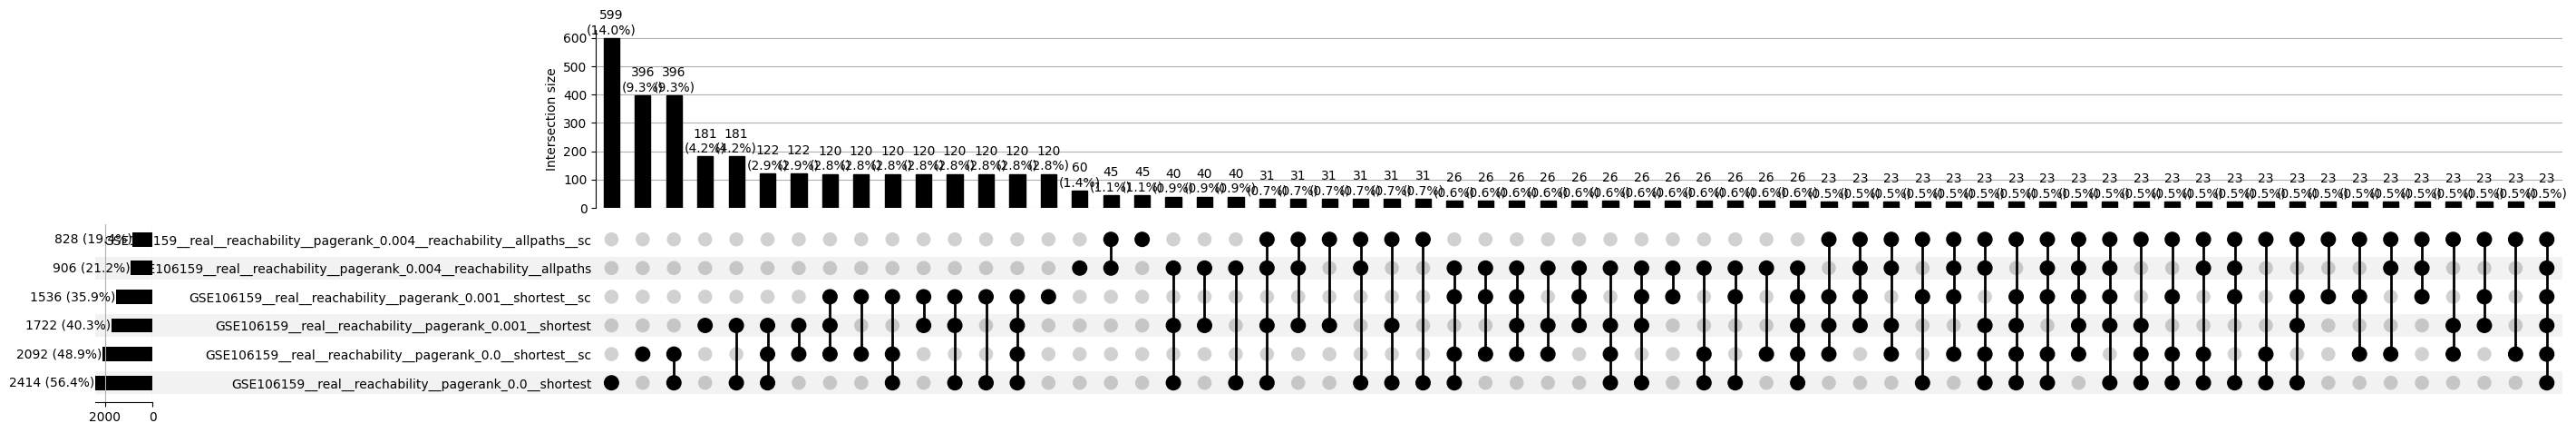

Computing random1 network
Computing path 1 with threshold 0.01
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.009
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.008
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.007
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.006
There were no sign consistent paths for the given perturbations and downstream ef

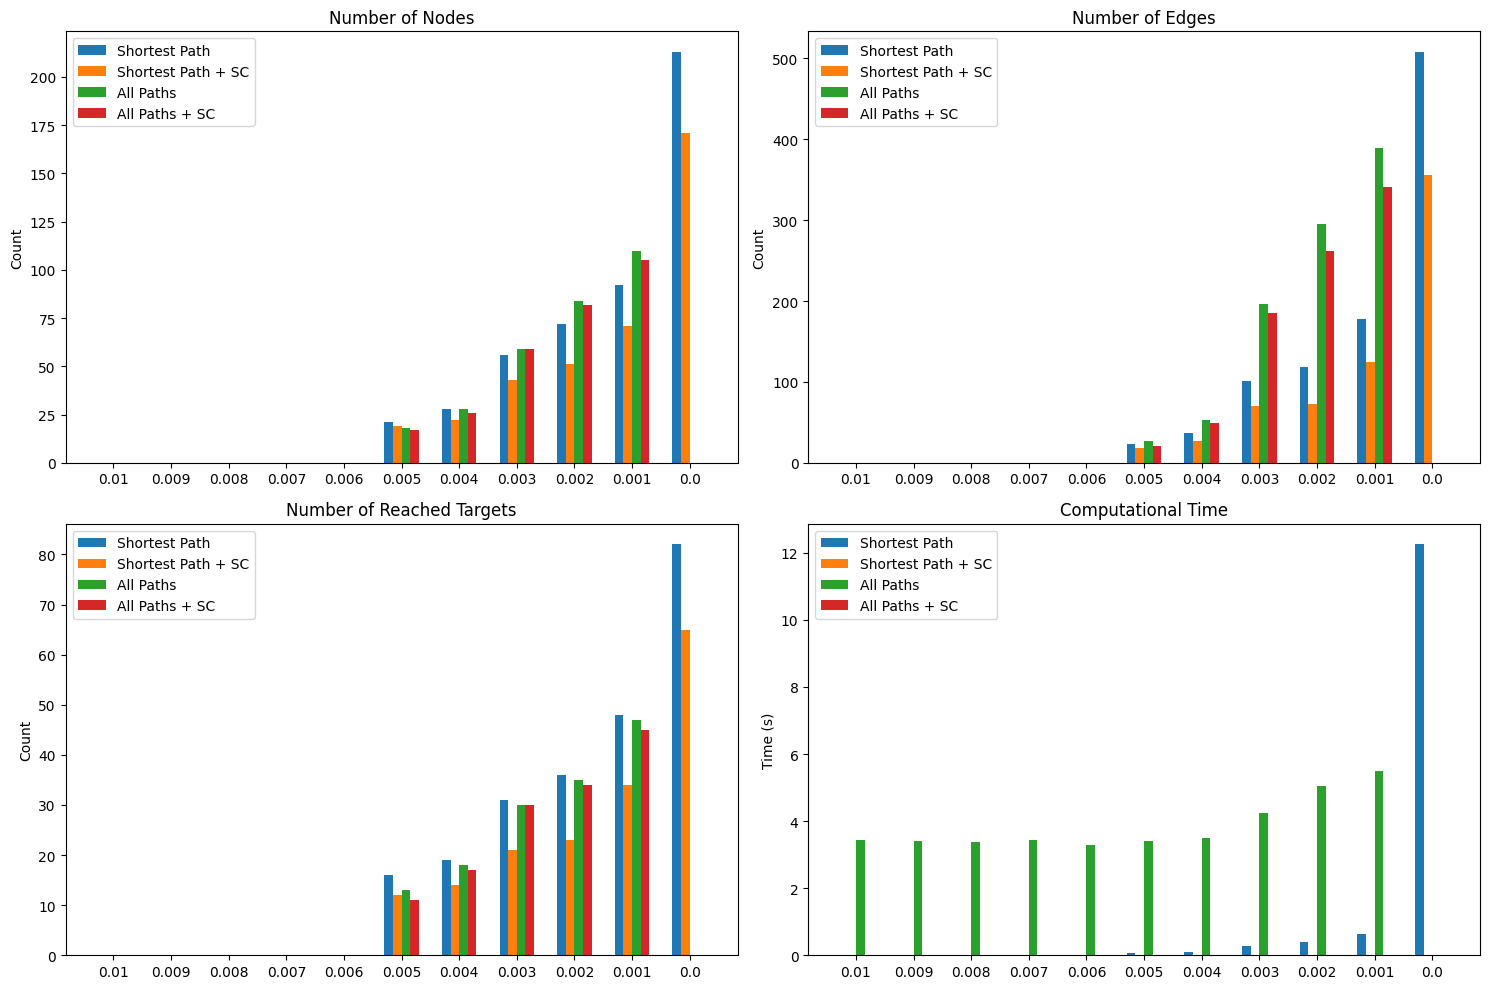

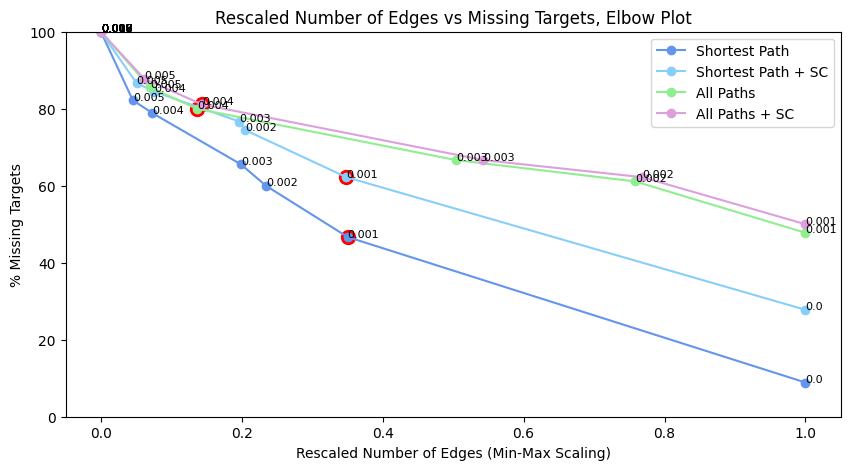

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

__pagerank_0.0__shortest v.s. __pagerank_0.0__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.639e+04
__pagerank_0.0__shortest__sc v.s. __pagerank_0.001__shortest: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.330e-02 U_stat=6.016e+03
__pagerank_0.001__shortest v.s. __pagerank_0.001__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.941e-01 U_stat=2.633e+03
__pagerank_0.001__shortest__sc v.s. __pagerank_0.004__reachability__allpaths: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.115e-06 U_stat=3.560e+02
__pagerank_0.004__reachability__allpaths v.s. __pagerank_0.004__reachability__allpaths__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=

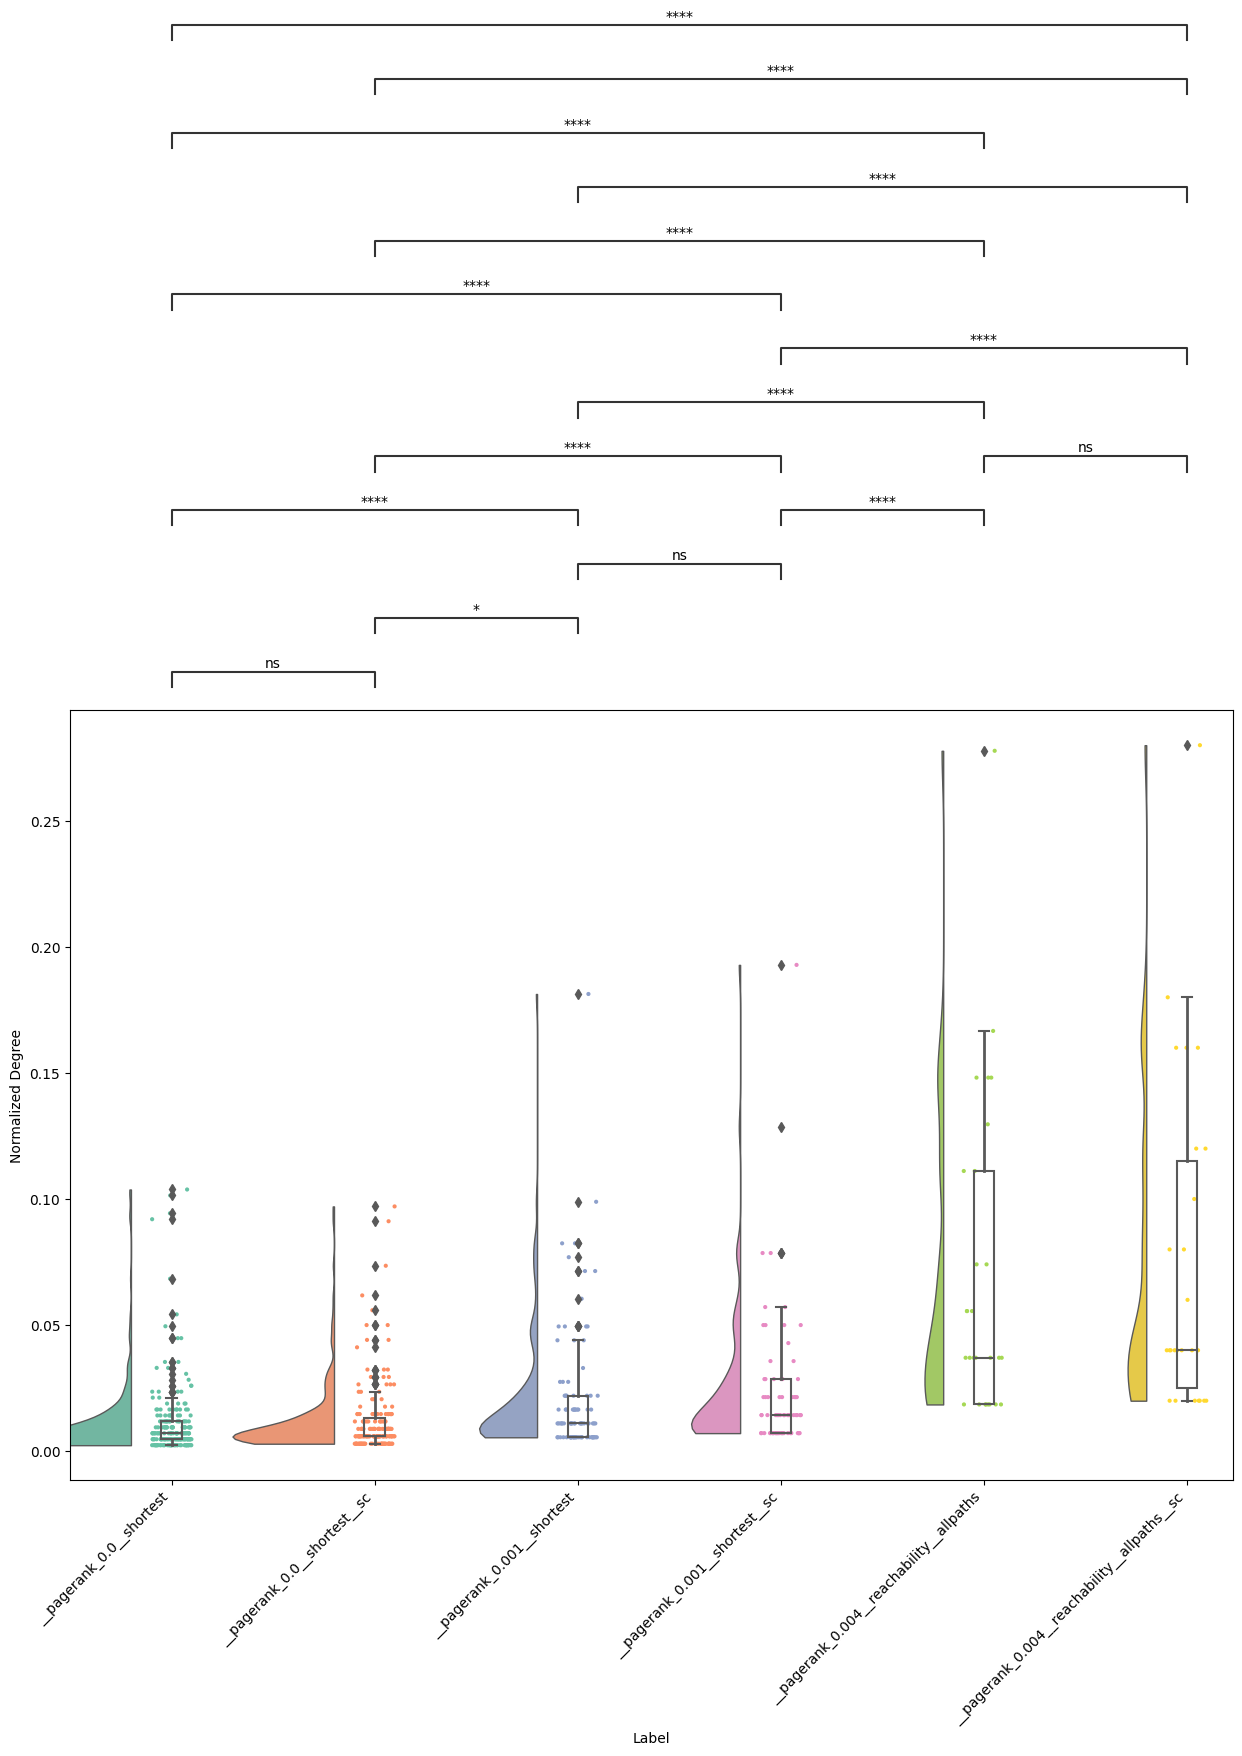

['GSE106159__random1__reachability__pagerank_0.0__shortest.sif', 'GSE106159__random1__reachability__pagerank_0.004__reachability__allpaths.sif', 'GSE106159__random1__reachability__pagerank_0.001__shortest.sif', 'GSE106159__random1__reachability__pagerank_0.004__reachability__allpaths__sc.sif', 'GSE106159__random1__reachability__pagerank_0.0__shortest__sc.sif', 'GSE106159__random1__reachability__pagerank_0.001__shortest__sc.sif']


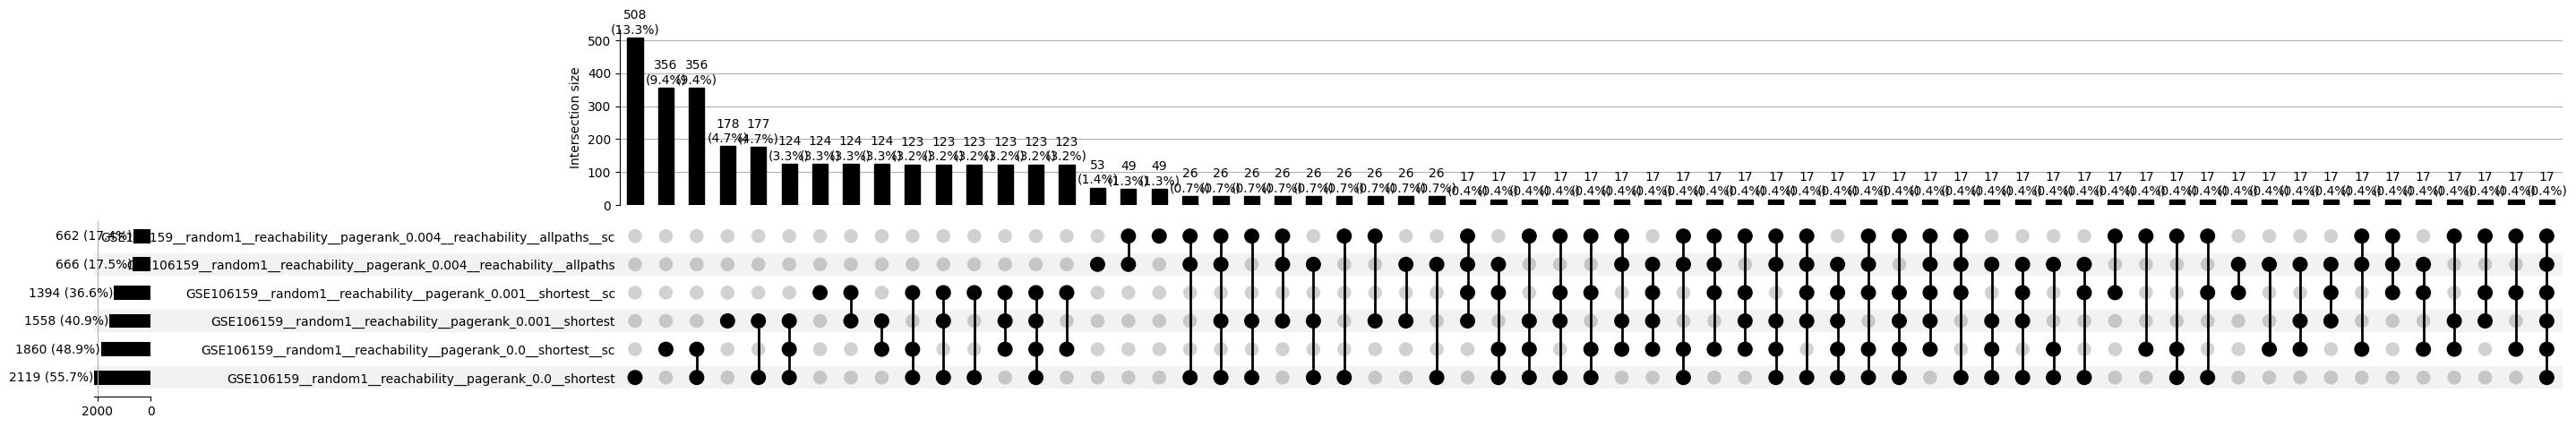

Computing random2 network
Computing path 1 with threshold 0.01
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.009
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.008
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.007
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.006
Computing path 1 with threshold 0.005
Computing path 1 with threshold 0.004
Compu

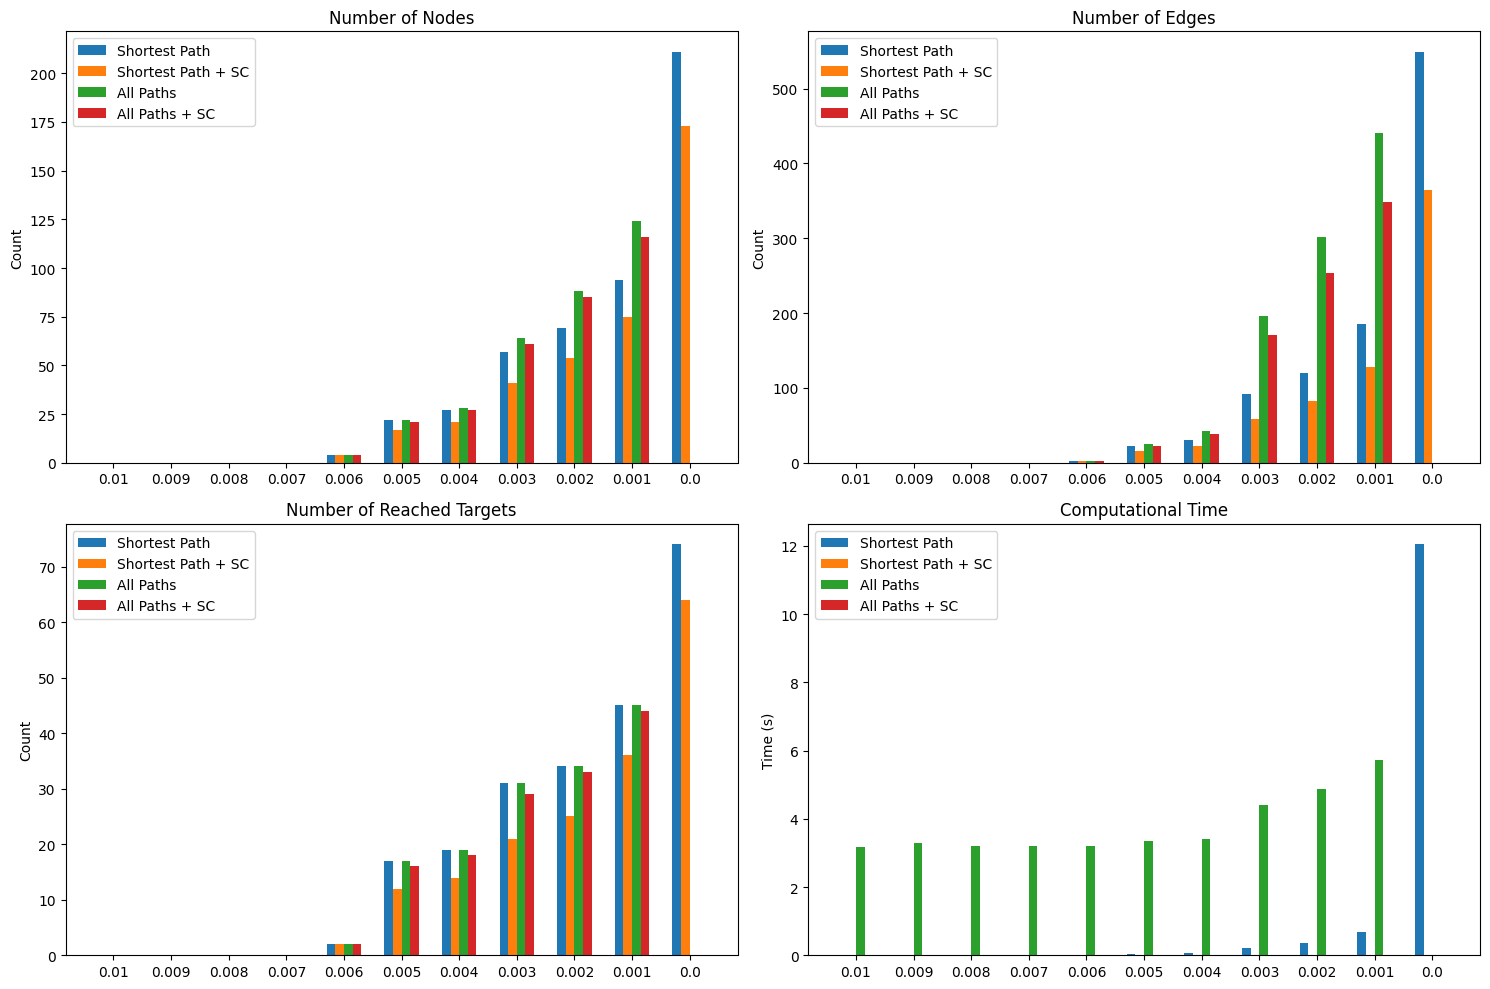

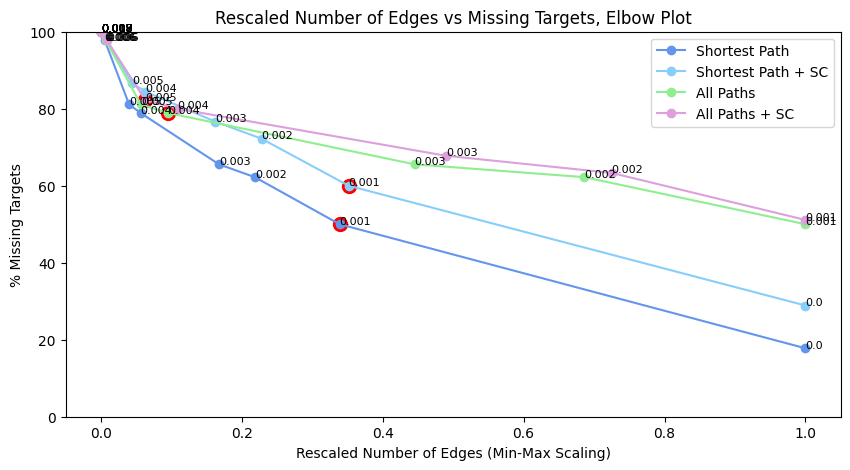

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

__pagerank_0.0__shortest v.s. __pagerank_0.0__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.718e+04
__pagerank_0.0__shortest__sc v.s. __pagerank_0.001__shortest: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.236e-03 U_stat=5.991e+03
__pagerank_0.001__shortest v.s. __pagerank_0.001__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.013e+03
__pagerank_0.001__shortest__sc v.s. __pagerank_0.004__reachability__allpaths: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.116e-04 U_stat=4.830e+02
__pagerank_0.004__reachability__allpaths v.s. __pagerank_0.005__reachability__allpaths__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=

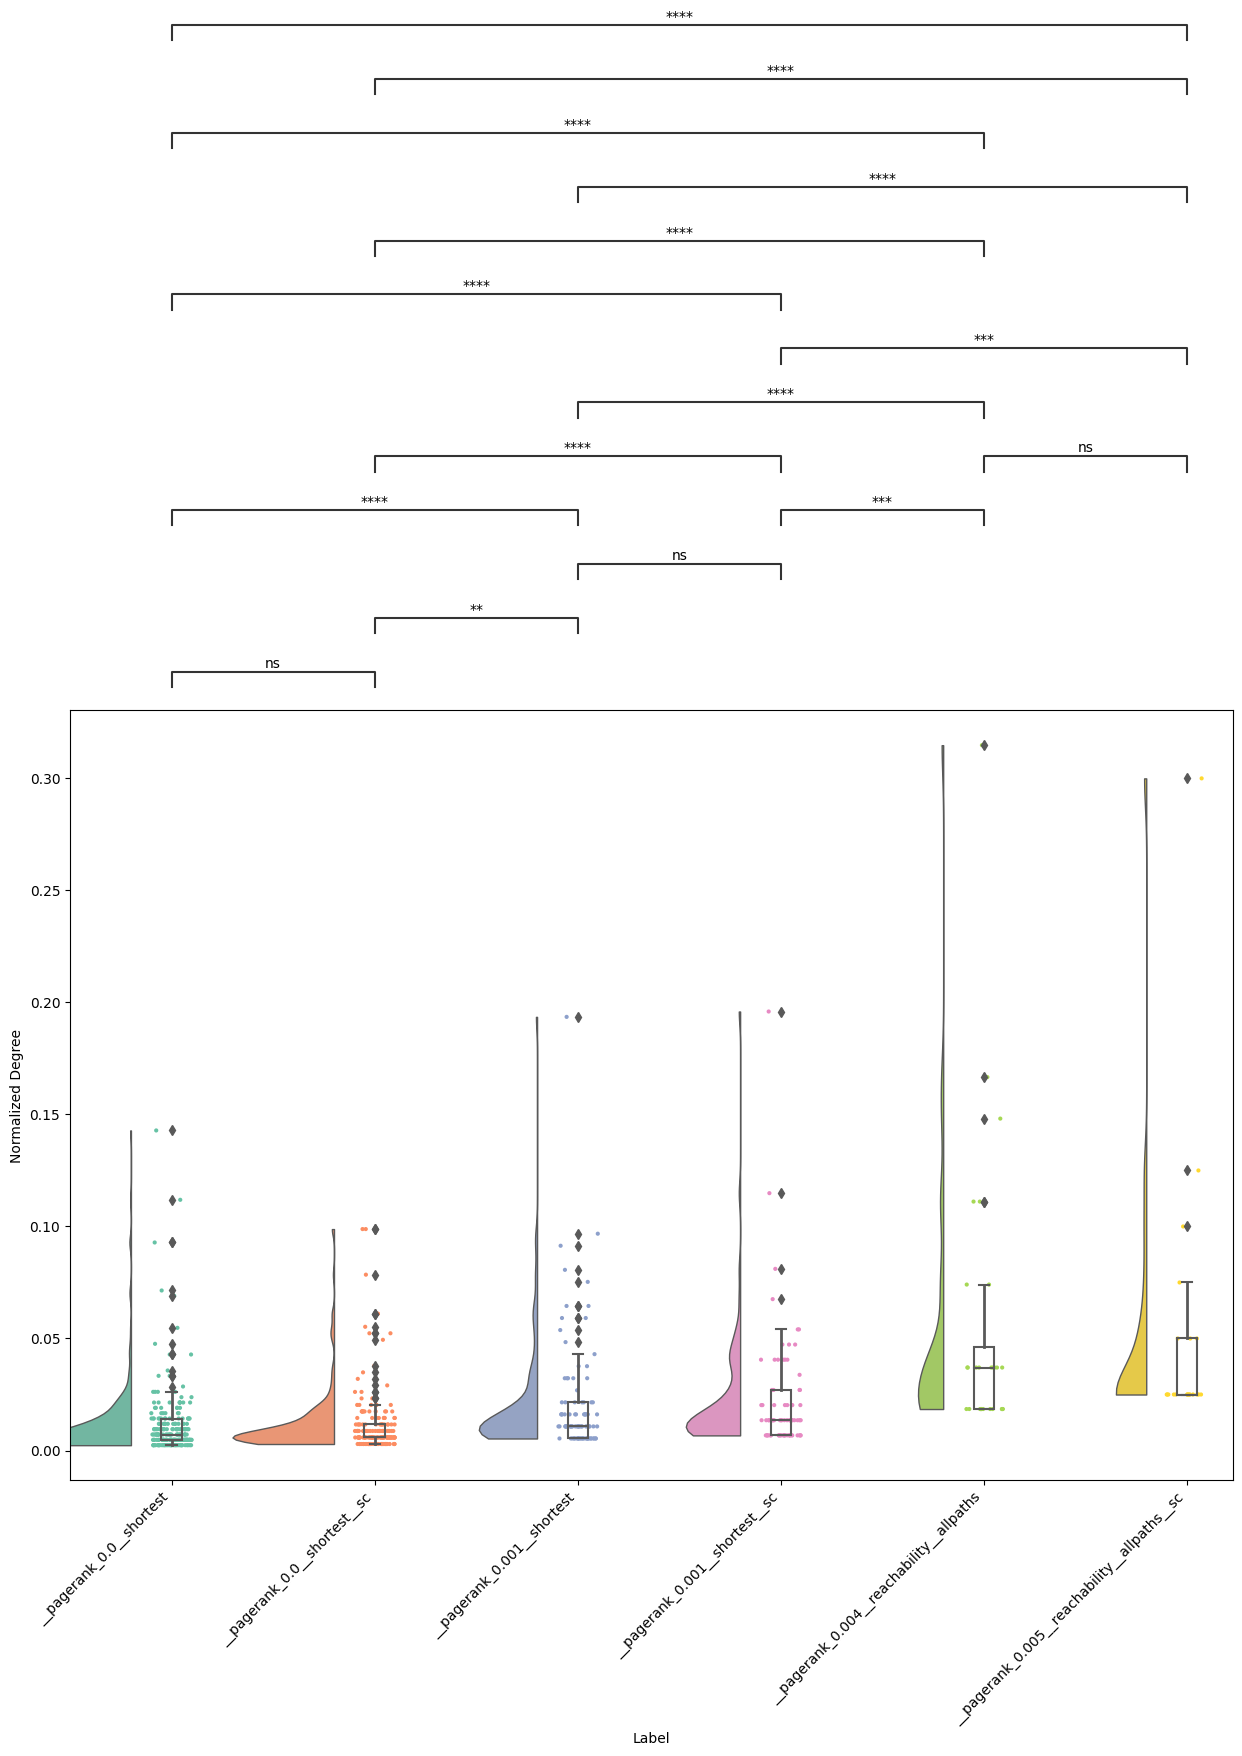

['GSE106159__random2__reachability__pagerank_0.001__shortest__sc.sif', 'GSE106159__random2__reachability__pagerank_0.0__shortest__sc.sif', 'GSE106159__random2__reachability__pagerank_0.004__reachability__allpaths.sif', 'GSE106159__random2__reachability__pagerank_0.005__reachability__allpaths__sc.sif', 'GSE106159__random2__reachability__pagerank_0.0__shortest.sif', 'GSE106159__random2__reachability__pagerank_0.001__shortest.sif']


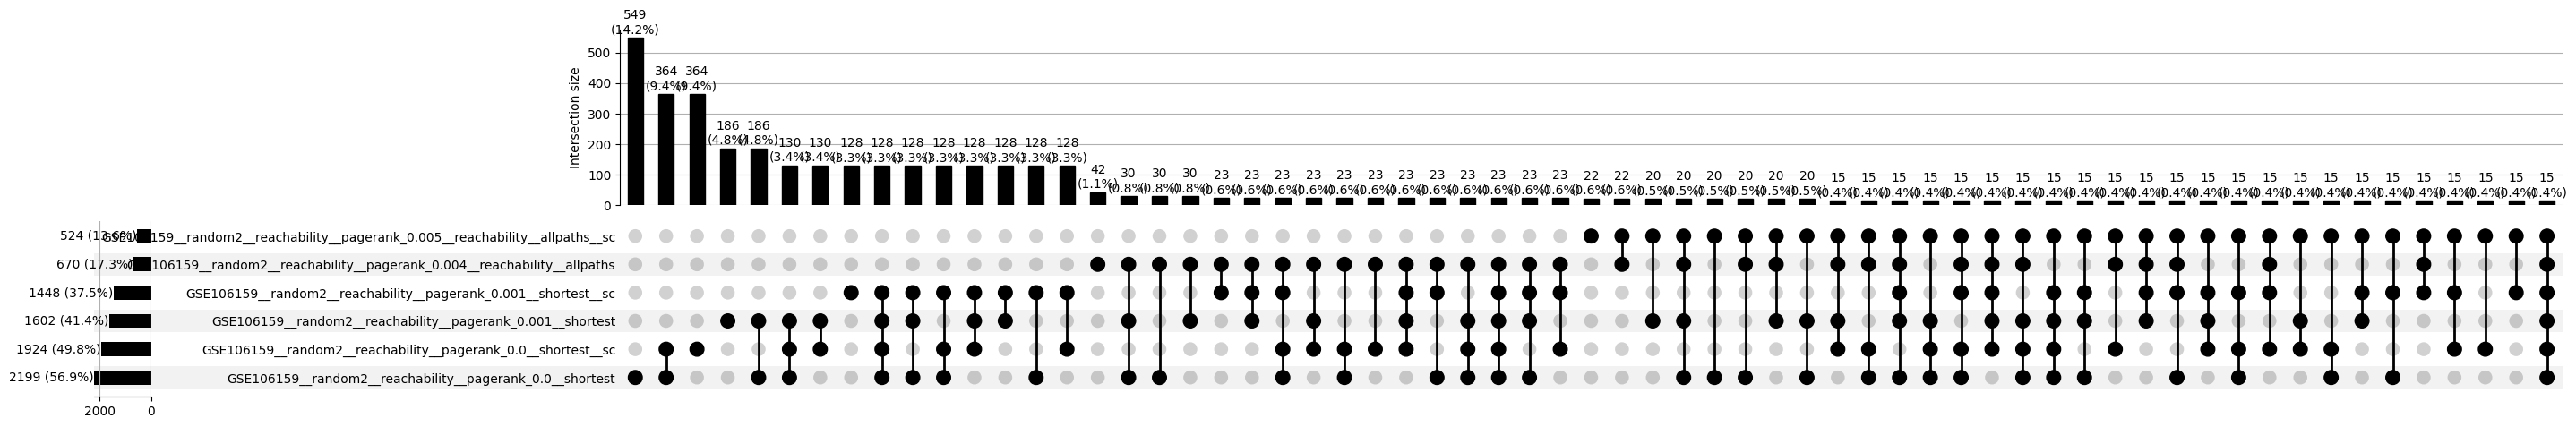

Computing random3 network
Computing path 1 with threshold 0.01
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.009
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.008
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.007
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.006
Computing path 1 with threshold 0.005
Computing path 1 with threshold 0.004
Computing path 1 with threshold 0.003
Computing path 1 with threshold 0.002
Computing path 1 with threshold 0.001
Computing path 1 with threshold 0.0
Computing path 2 with threshold

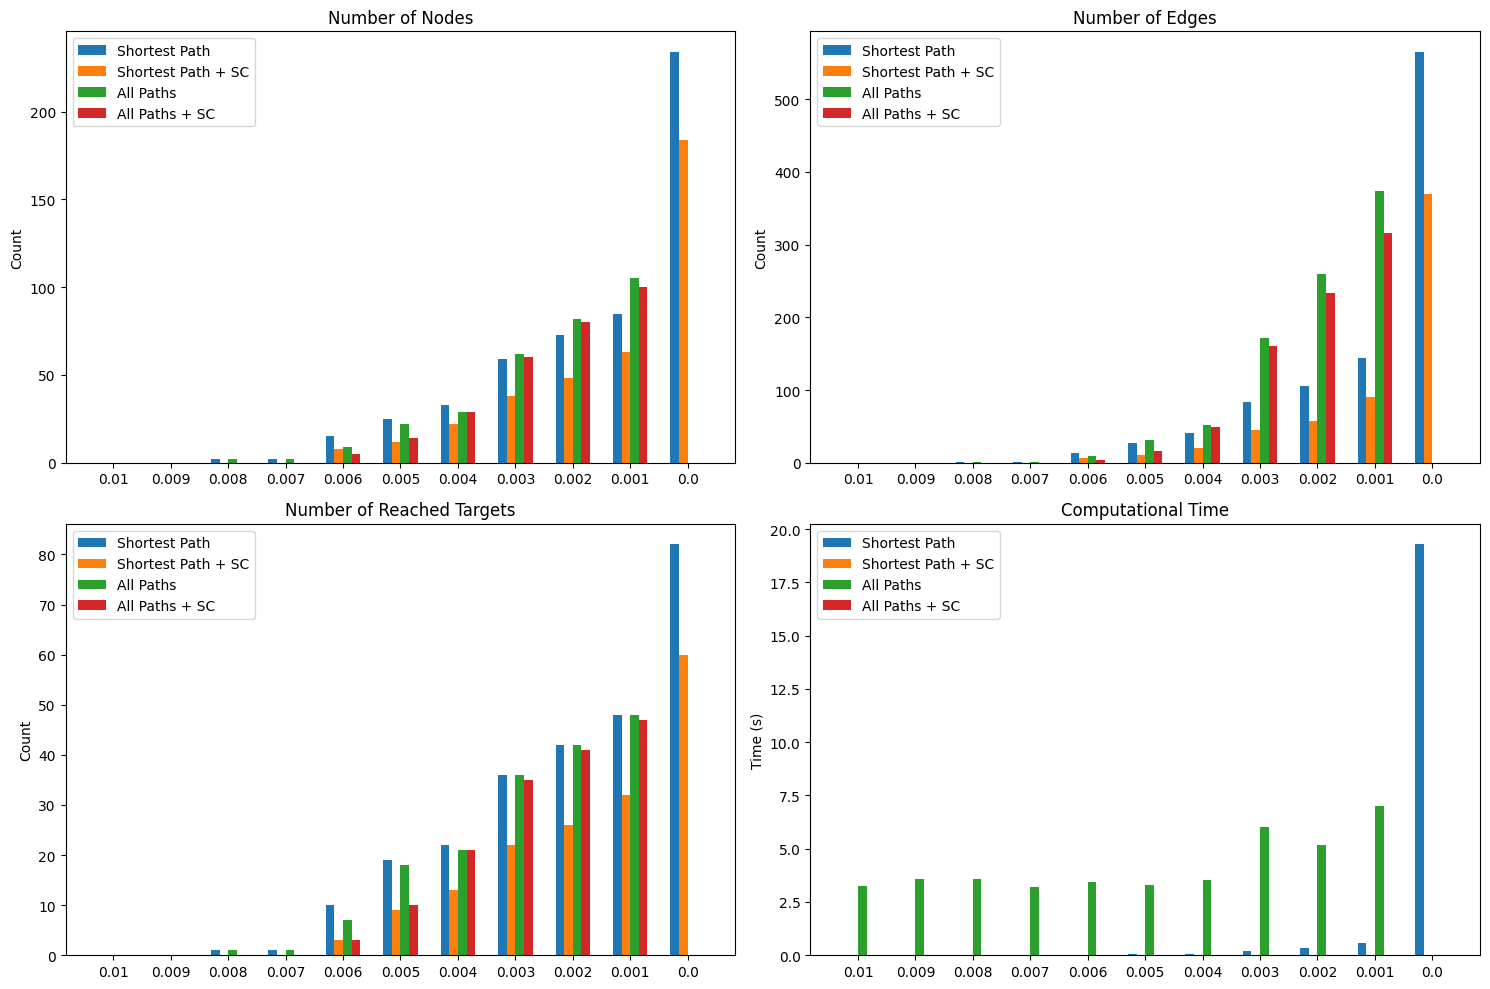

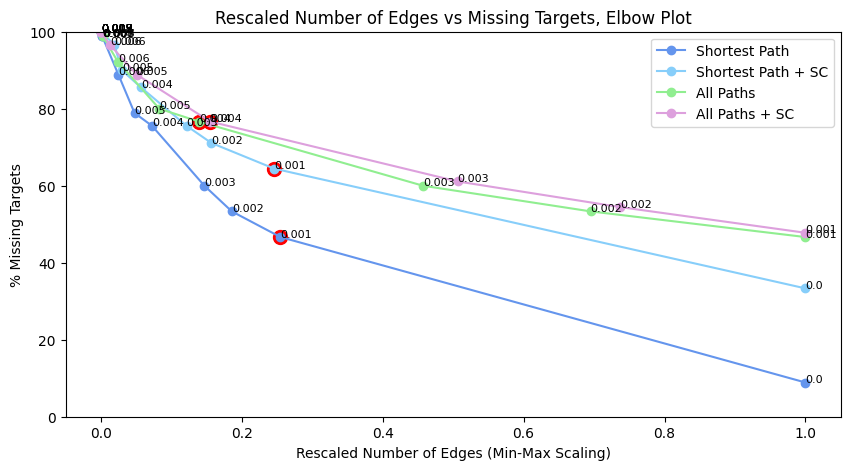

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

__pagerank_0.0__shortest v.s. __pagerank_0.0__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.982e+04
__pagerank_0.0__shortest__sc v.s. __pagerank_0.001__shortest: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.474e-09 U_stat=4.142e+03
__pagerank_0.001__shortest v.s. __pagerank_0.001__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.018e-01 U_stat=2.047e+03
__pagerank_0.001__shortest__sc v.s. __pagerank_0.004__reachability__allpaths: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.053e-05 U_stat=3.480e+02
__pagerank_0.004__reachability__allpaths v.s. __pagerank_0.004__reachability__allpaths__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=

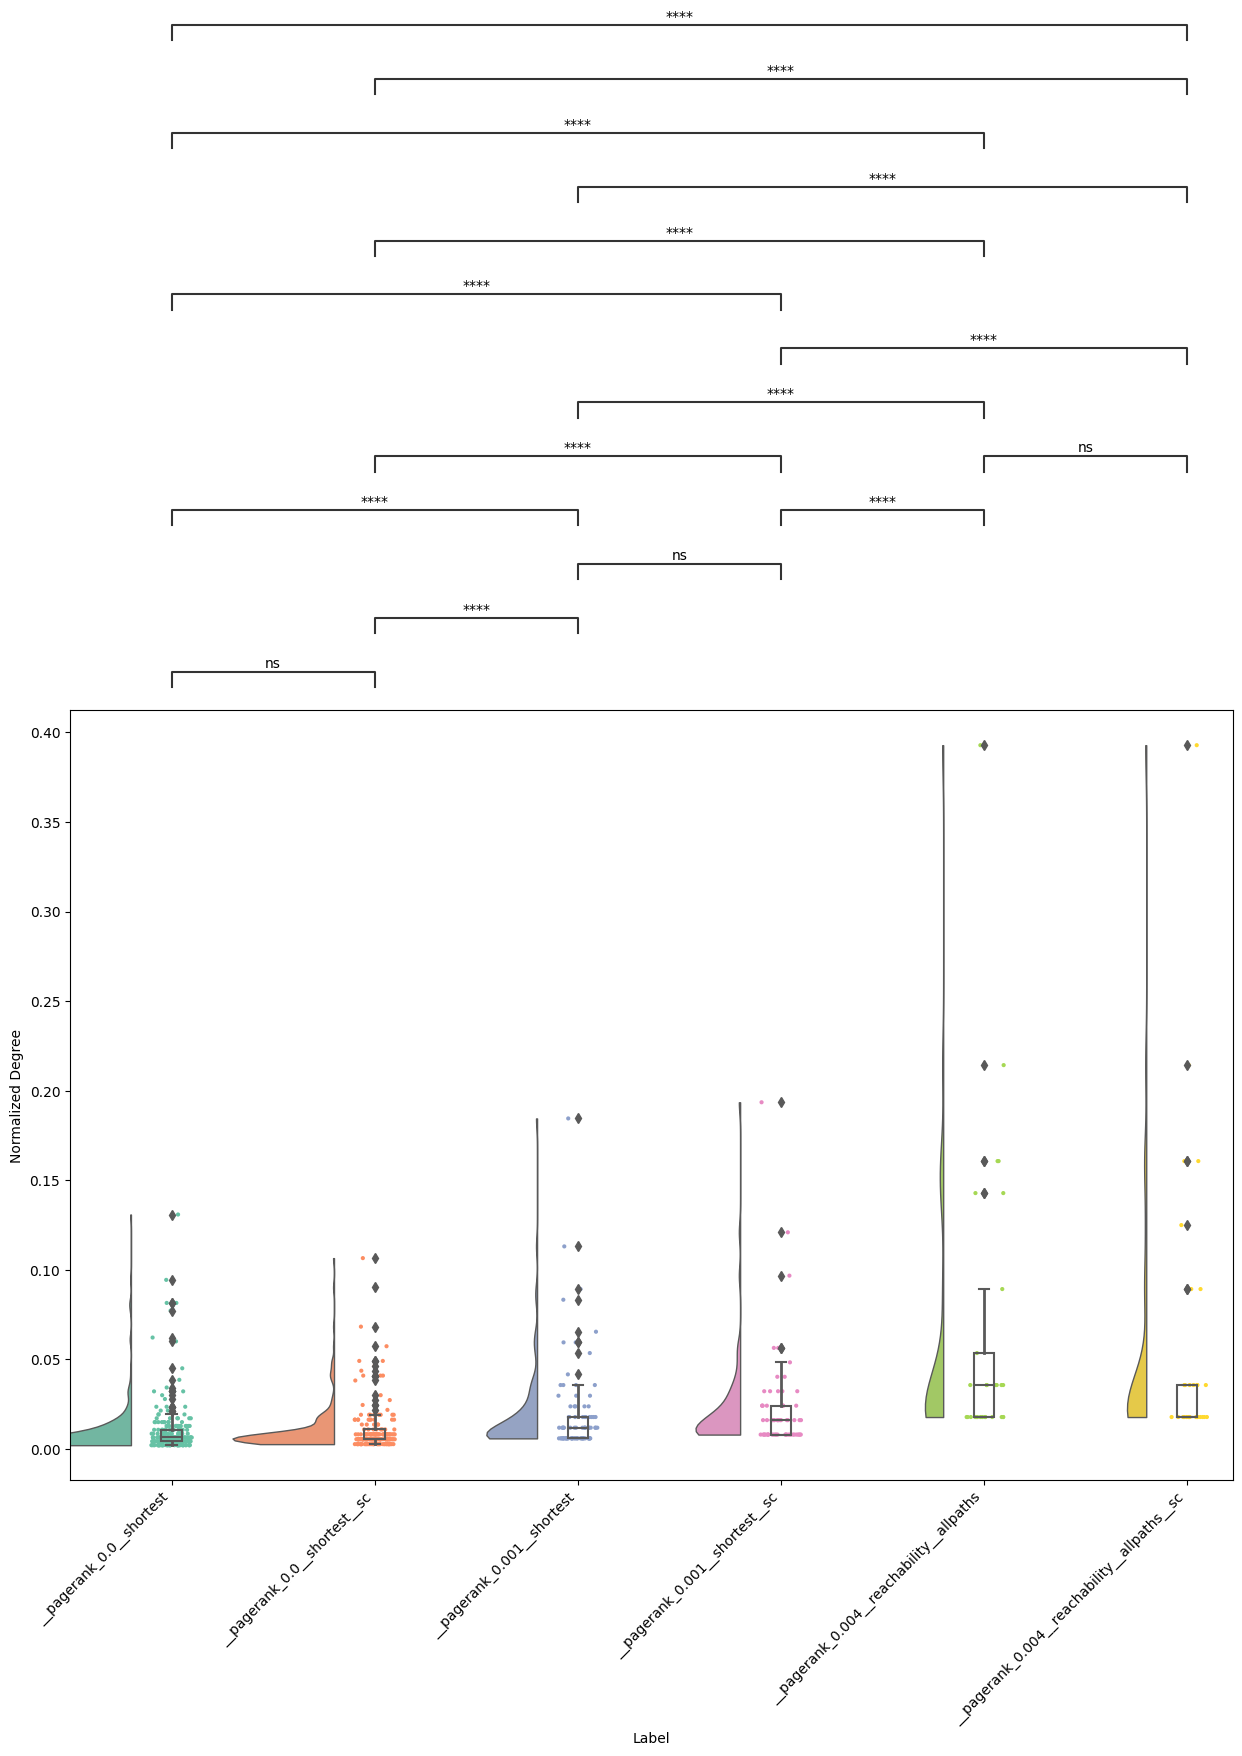

['GSE106159__random3__reachability__pagerank_0.001__shortest__sc.sif', 'GSE106159__random3__reachability__pagerank_0.001__shortest.sif', 'GSE106159__random3__reachability__pagerank_0.004__reachability__allpaths.sif', 'GSE106159__random3__reachability__pagerank_0.004__reachability__allpaths__sc.sif', 'GSE106159__random3__reachability__pagerank_0.0__shortest__sc.sif', 'GSE106159__random3__reachability__pagerank_0.0__shortest.sif']


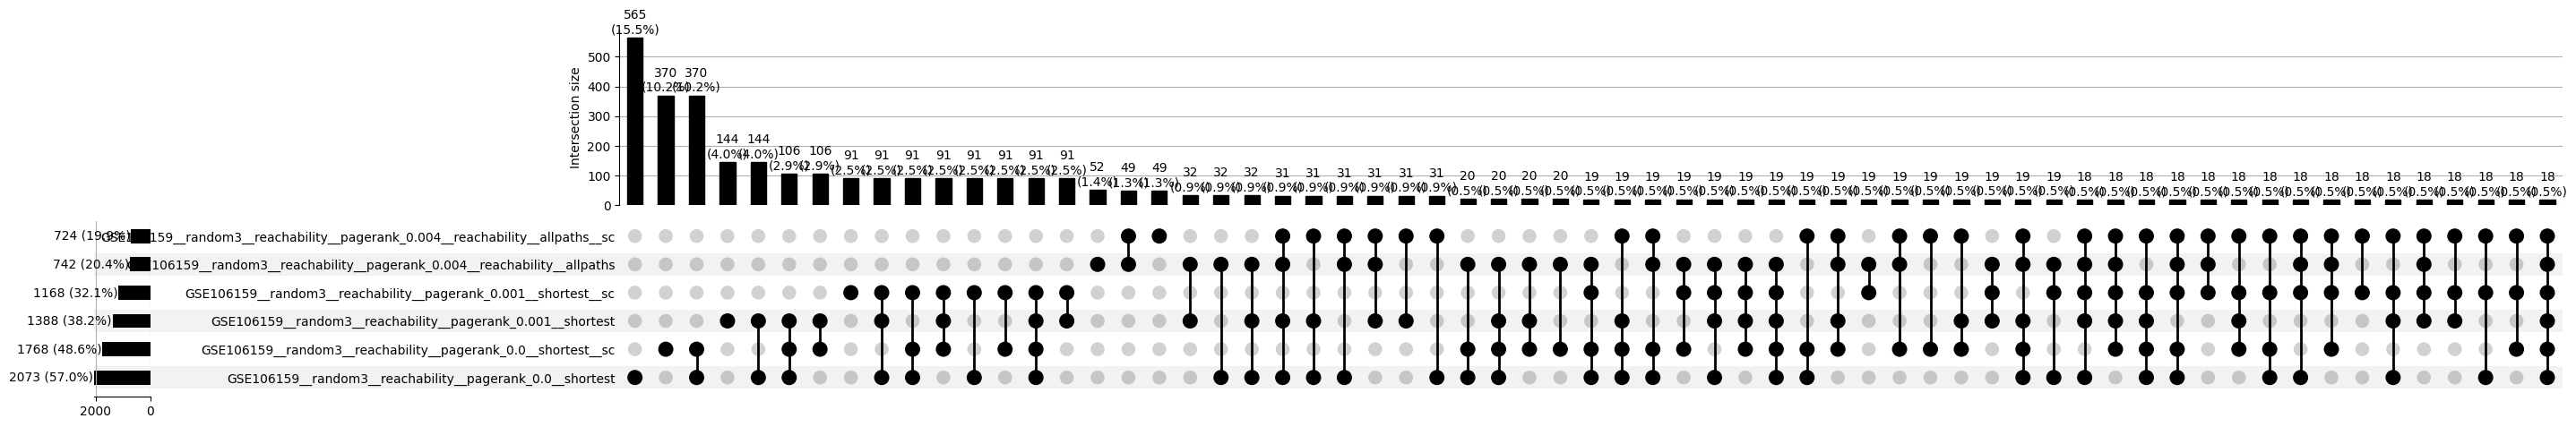

Computing random4 network
Computing path 1 with threshold 0.01
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.009
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.008
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.007
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.006
There were no sign consistent paths for the given perturbations and downstream ef

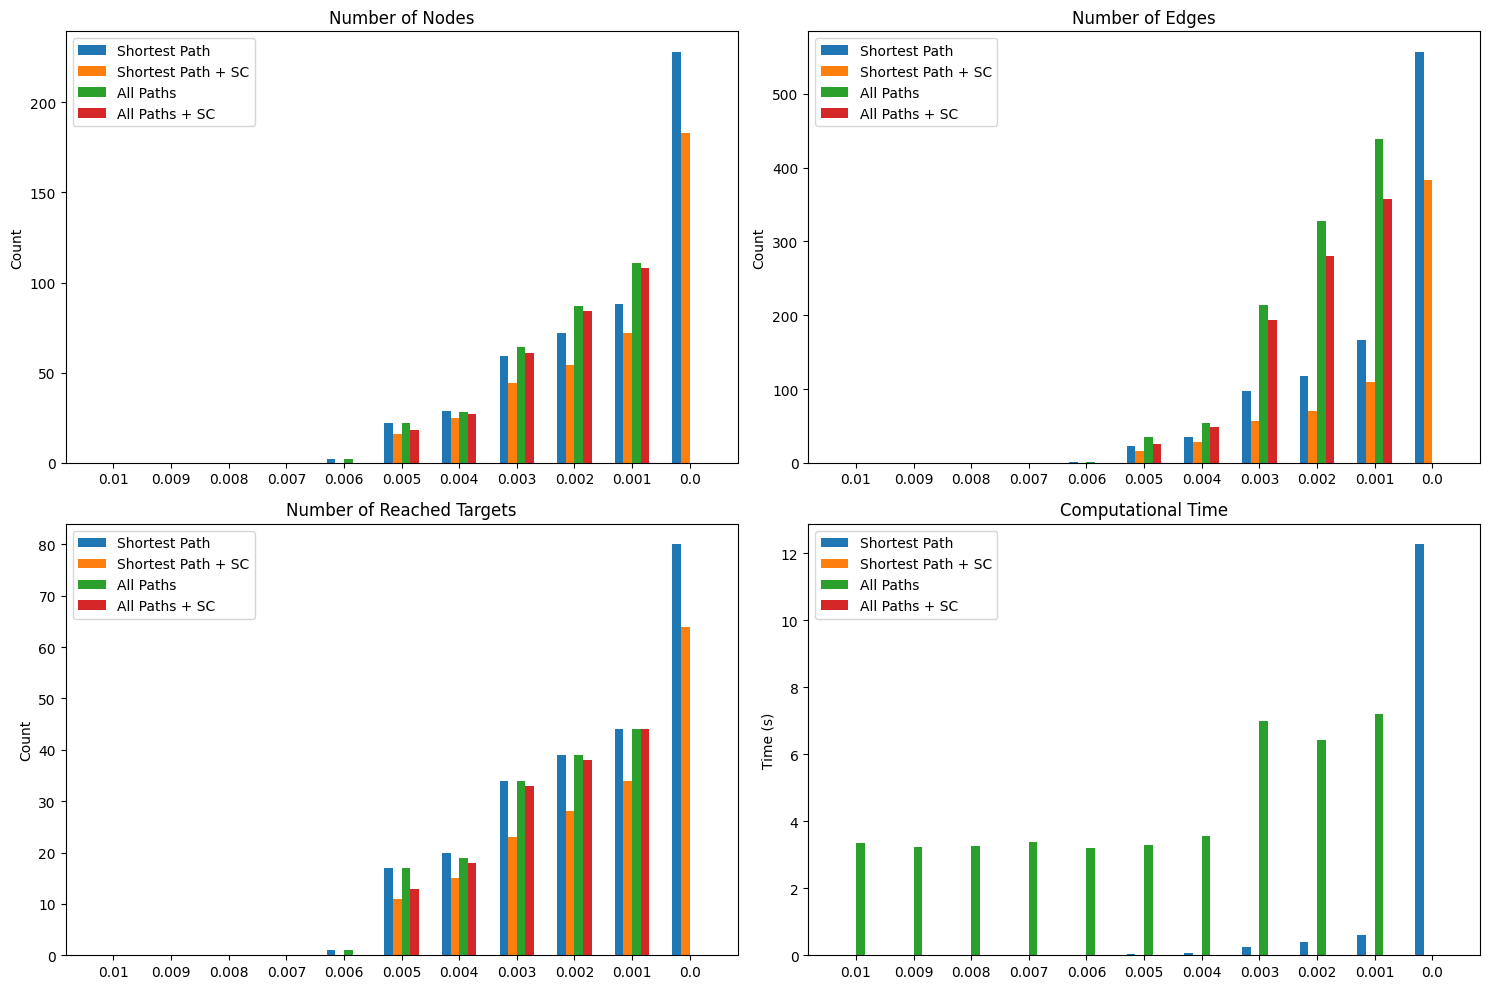

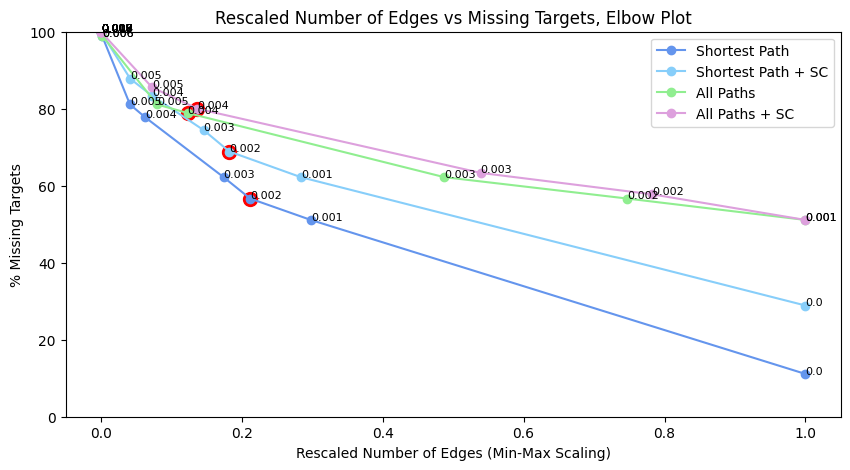

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

__pagerank_0.0__shortest v.s. __pagerank_0.0__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.941e-01 U_stat=1.867e+04
__pagerank_0.0__shortest__sc v.s. __pagerank_0.002__shortest: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.714e-08 U_stat=3.472e+03
__pagerank_0.002__shortest v.s. __pagerank_0.002__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.336e-01 U_stat=1.536e+03
__pagerank_0.002__shortest__sc v.s. __pagerank_0.004__reachability__allpaths: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.416e-02 U_stat=4.380e+02
__pagerank_0.004__reachability__allpaths v.s. __pagerank_0.004__reachability__allpaths__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=

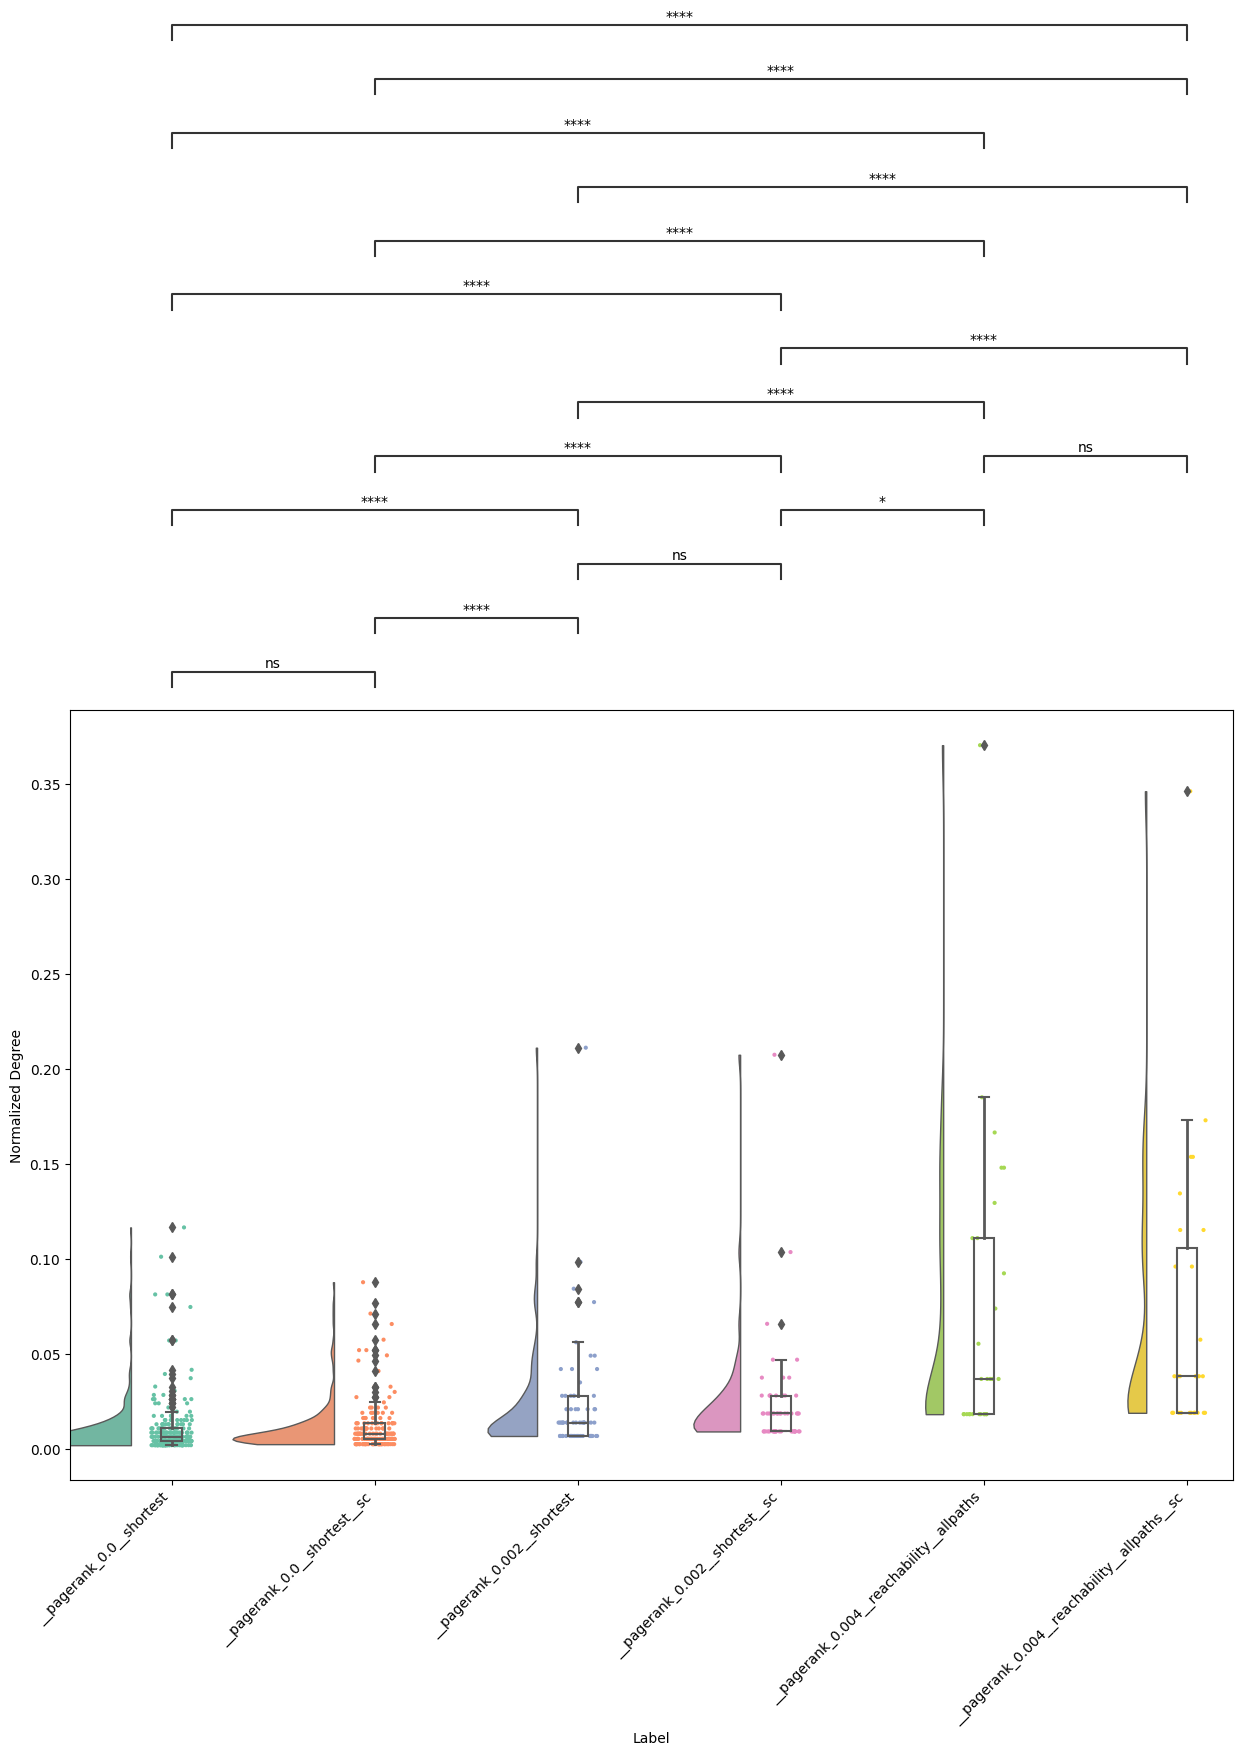

['GSE106159__random4__reachability__pagerank_0.0__shortest__sc.sif', 'GSE106159__random4__reachability__pagerank_0.004__reachability__allpaths__sc.sif', 'GSE106159__random4__reachability__pagerank_0.002__shortest__sc.sif', 'GSE106159__random4__reachability__pagerank_0.002__shortest.sif', 'GSE106159__random4__reachability__pagerank_0.004__reachability__allpaths.sif', 'GSE106159__random4__reachability__pagerank_0.0__shortest.sif']


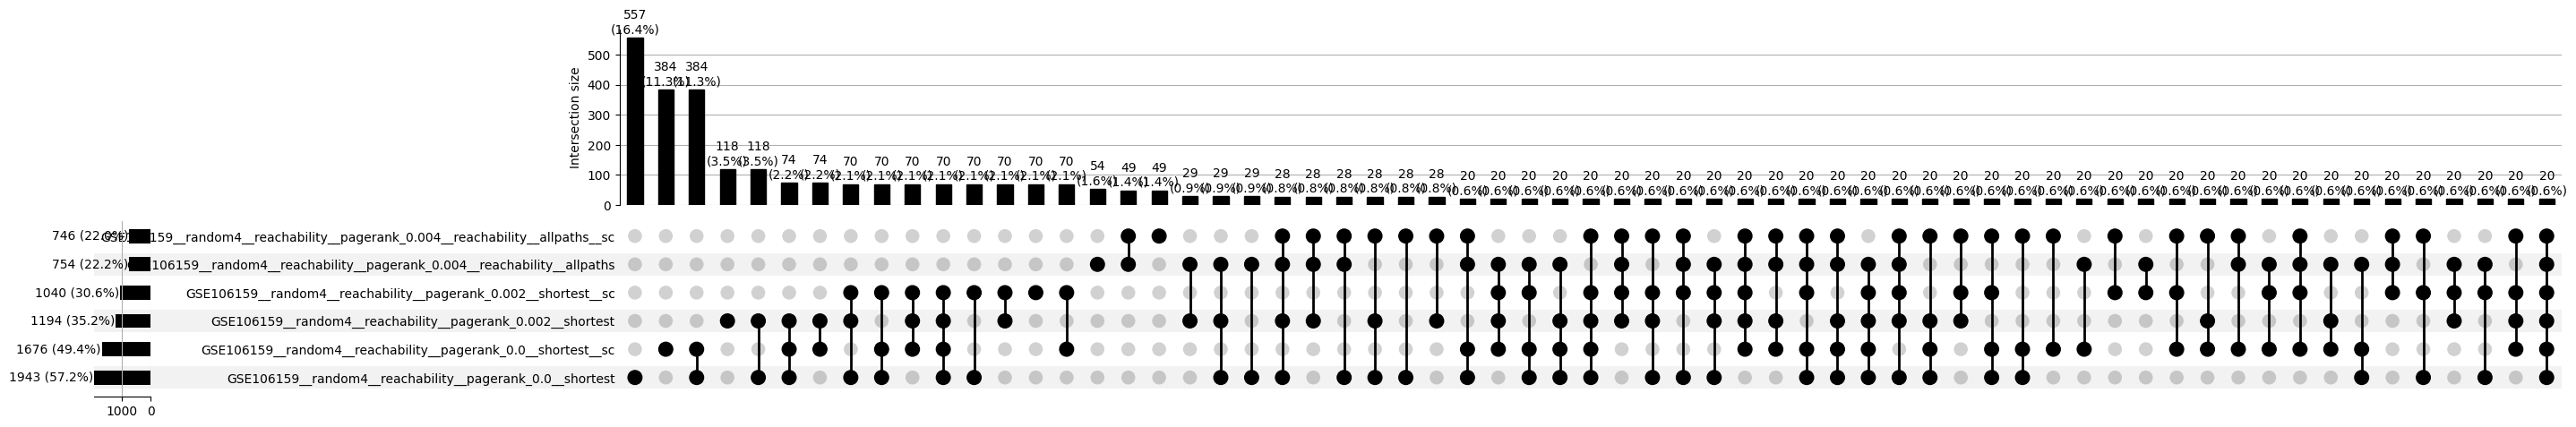

Computing random5 network
Computing path 1 with threshold 0.01
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.009
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.008
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.007
There were no sign consistent paths for the given perturbations and downstream effects.
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.006
There were no sign consistent paths for the given perturbations and downstream ef

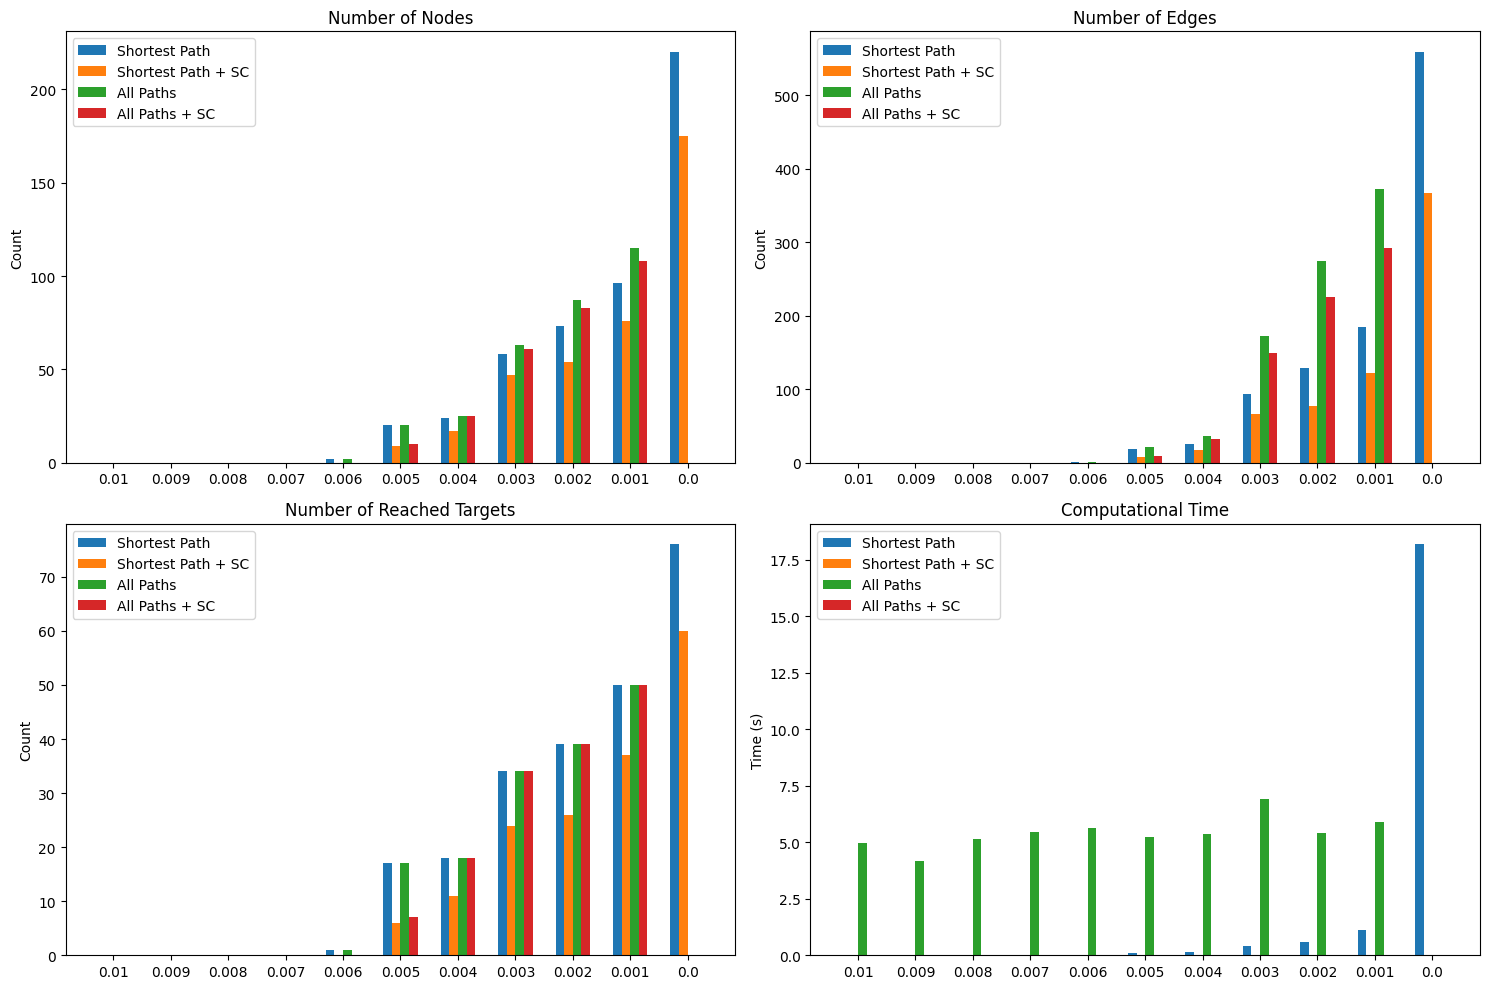

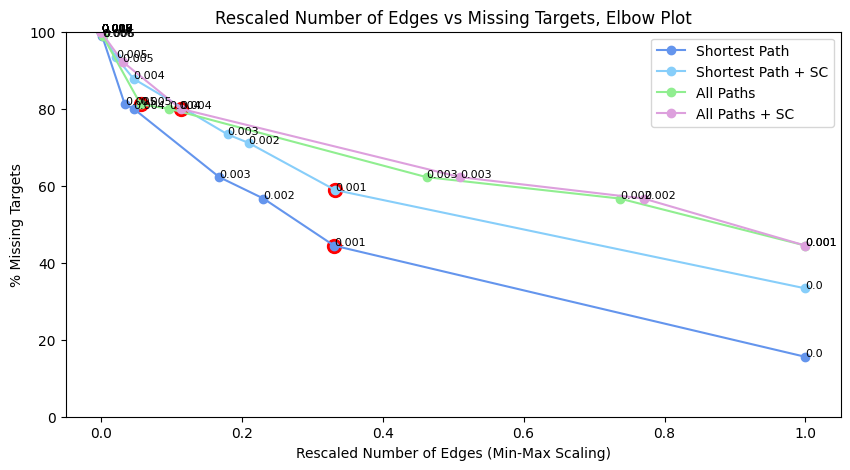

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

__pagerank_0.0__shortest v.s. __pagerank_0.0__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.781e+04
__pagerank_0.0__shortest__sc v.s. __pagerank_0.001__shortest: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.110e-01 U_stat=6.760e+03
__pagerank_0.001__shortest v.s. __pagerank_0.001__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.067e+03
__pagerank_0.001__shortest__sc v.s. __pagerank_0.005__reachability__allpaths: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.020e-04 U_stat=2.720e+02
__pagerank_0.005__reachability__allpaths v.s. __pagerank_0.004__reachability__allpaths__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=

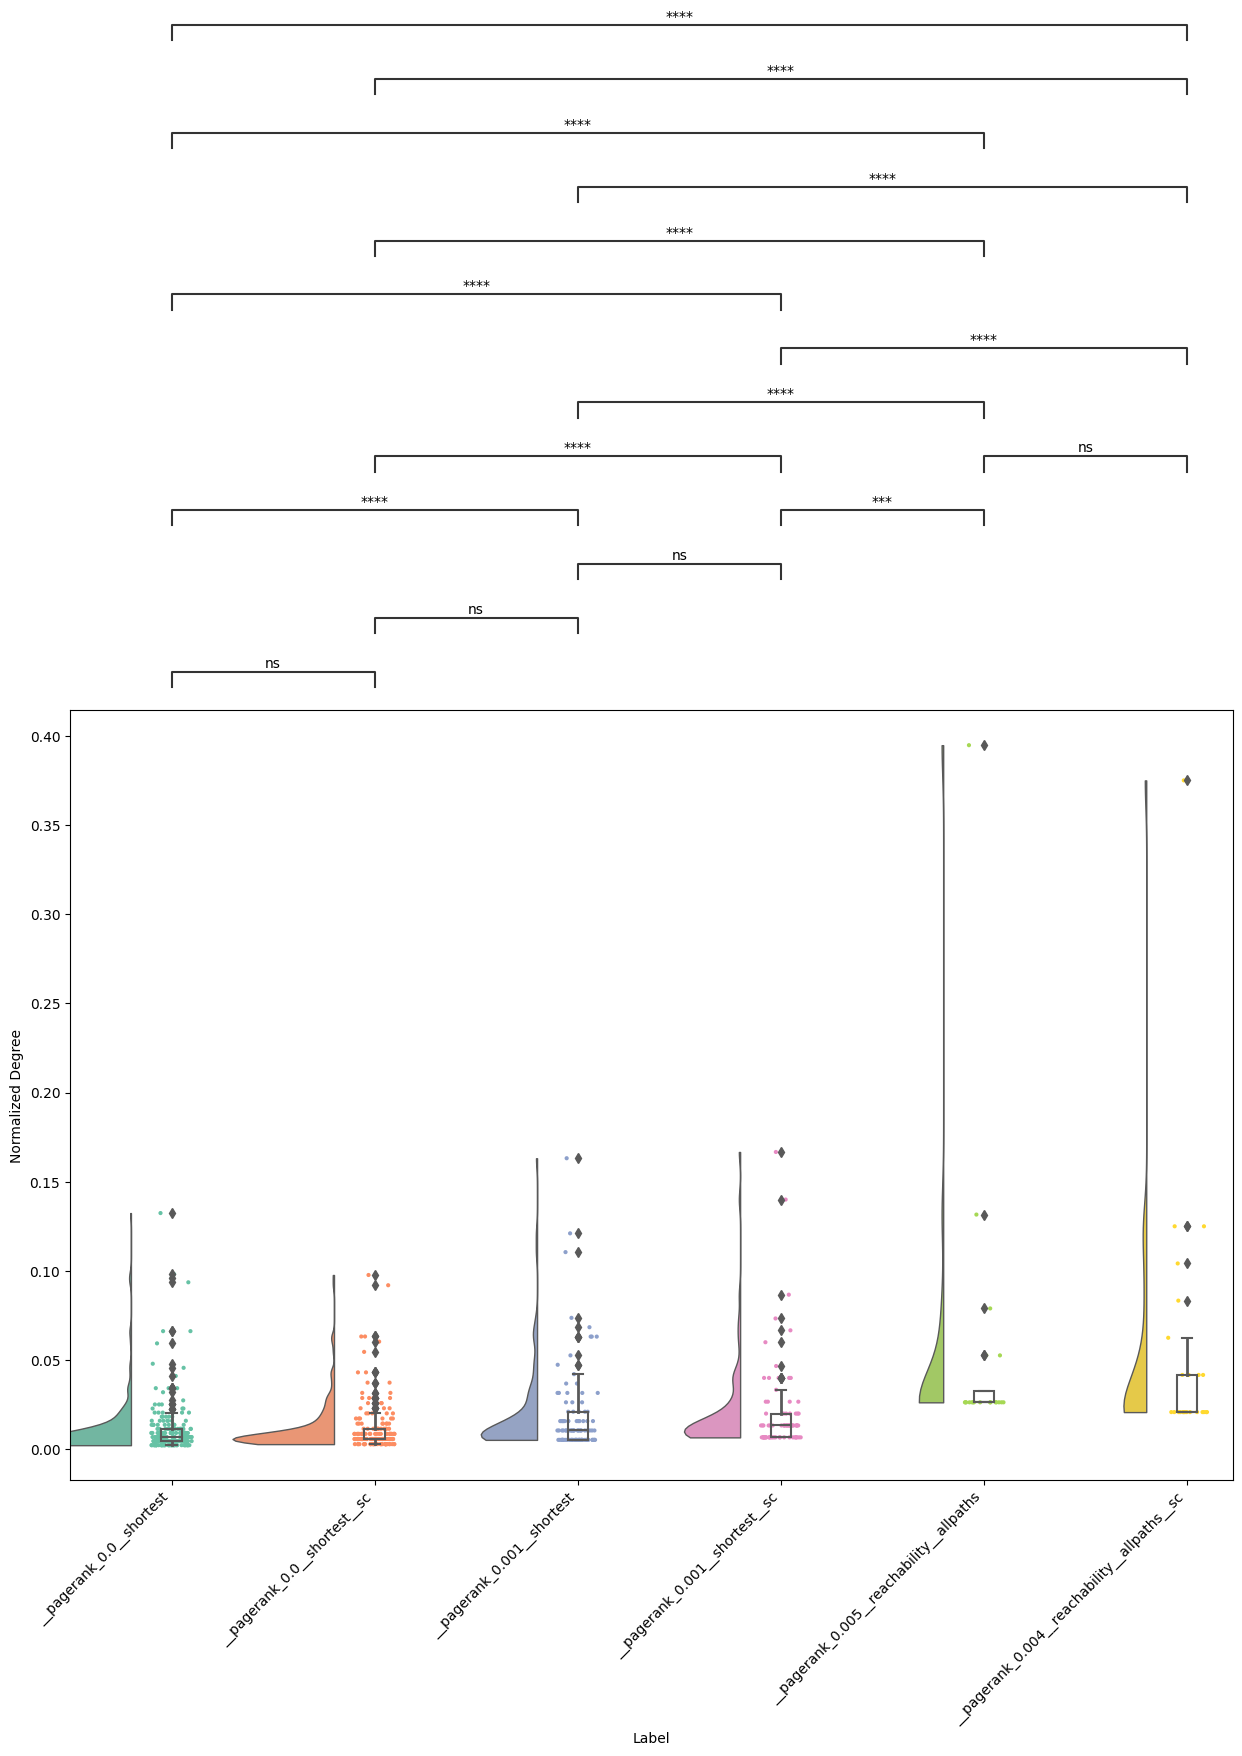

['GSE106159__random5__reachability__pagerank_0.001__shortest__sc.sif', 'GSE106159__random5__reachability__pagerank_0.0__shortest.sif', 'GSE106159__random5__reachability__pagerank_0.004__reachability__allpaths__sc.sif', 'GSE106159__random5__reachability__pagerank_0.0__shortest__sc.sif', 'GSE106159__random5__reachability__pagerank_0.001__shortest.sif', 'GSE106159__random5__reachability__pagerank_0.005__reachability__allpaths.sif']


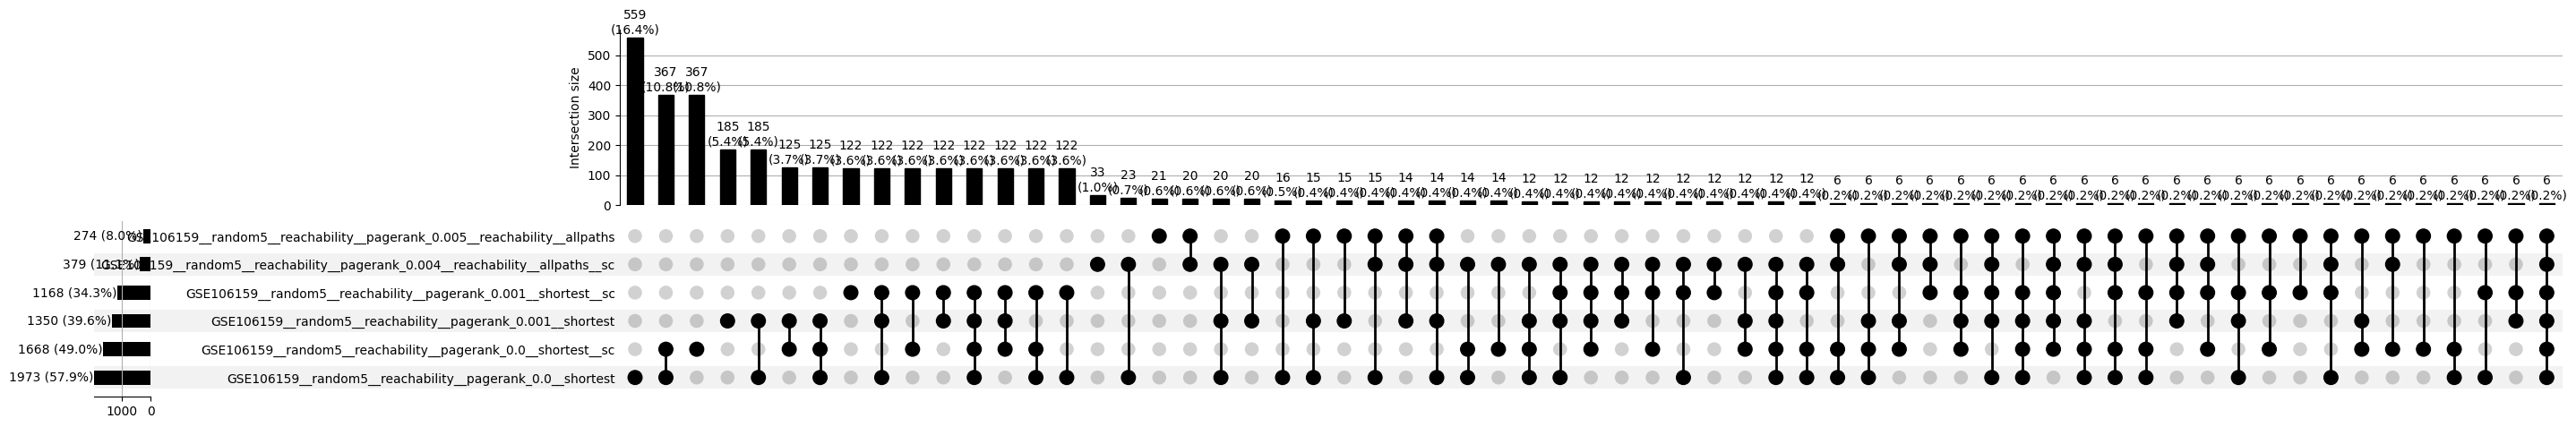

In [13]:
runs = ['real', 'random1', 'random2', 'random3', 'random4', 'random5']

test_targets_dict = {}
for run in runs:
    print(f'Computing {run} network')
    if run == 'real':
        pass
    elif 'random' in run:
        random_target_names = random.sample(target_names,100)
        target_GEO = {random_target_names[i]: value for i, (old_key, value) in enumerate(target_GEO.items())}
    
    train_target, test_target = train_test_split(target_GEO, 10)

    test_targets_dict[run] = test_target

    G2P_solver = Solver(G, 'GSE106159')
    G2P_solver.source_dict = {'TWIST1': -1}
    filtered_target_dict = {key: value for key, value in train_target.items() if key not in G2P_solver.source_dict.keys()}
    G2P_solver.target_dict = filtered_target_dict
    G2P_solver.network_batchrun(run, cutoff=3)

test_targets_df = pd.DataFrame.from_dict(test_targets_dict)

In [21]:
test_targets_df.to_csv('GSE106159__testtargets.csv')

In [6]:
test_targets_dict = pd.read_csv('GSE106159__testtargets.csv', index_col=0).to_dict()
test_targets_dict

{'real': {'MGAM': -1.0,
  'PDE10A': -1.0,
  'ZBTB38': -1.0,
  'SMARCC1': -1.0,
  'GOLGB1': -1.0,
  'GMEB1': 1.0,
  'ABCA3': 1.0,
  'SLC12A5': -1.0,
  'COL6A1': -1.0,
  'CILP': -1.0,
  'AQP1': nan,
  'ADGRG1': nan,
  'TYK2': nan,
  'ZNF750': nan,
  'PTGIS': nan,
  'ATP4A': nan,
  'WBP1': nan,
  'IL5RA': nan,
  'CABIN1': nan,
  'BHLHE41': nan,
  'EXOC2': nan,
  'SWI5': nan,
  'CSNK1A1': nan,
  'KIN': nan,
  'KLK3': nan,
  'RHOC': nan,
  'SUMO4': nan,
  'CISH': nan,
  'NUPR1': nan,
  'NRP1': nan,
  'MT1G': nan,
  'TACR1': nan,
  'SLC9A3R2': nan,
  'ST18': nan,
  'HPS5': nan,
  'HSPA7': nan,
  'SAT1': nan,
  'GSK3B': nan,
  'PPARG': nan,
  'NBPF1': nan,
  'KIF11': nan,
  'FGF13': nan,
  'ATF3': nan,
  'CYSLTR2': nan,
  'APLN': nan,
  'HLA-DRA': nan,
  'UCHL5': nan,
  'SLC5A1': nan,
  'ADAMTS13': nan,
  'GRK3': nan,
  'GABPB2': nan,
  'PSMD10': nan,
  'PCCA': nan,
  'FABP3': nan,
  'ADAM2': nan,
  'NTSR2': nan,
  'ARHGEF6': nan,
  'CREG1': nan,
  'TFPT': nan,
  'ESRRG': nan},
 'random1': {'

In [14]:
G2P_solver = Solver(G, 'GSE106159')
G2P_solver.source_dict = {'TWIST1': -1}
filtered_target_dict = {key: value for key, value in target_GEO.items() if key not in G2P_solver.source_dict.keys()}
G2P_solver.target_dict = filtered_target_dict

In [3]:
from evaluation import Eval

In [5]:
G2P_eval = Eval(G, './results/', 'GSE106159')



/home/victo/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


ValueError: array must not contain infs or NaNs

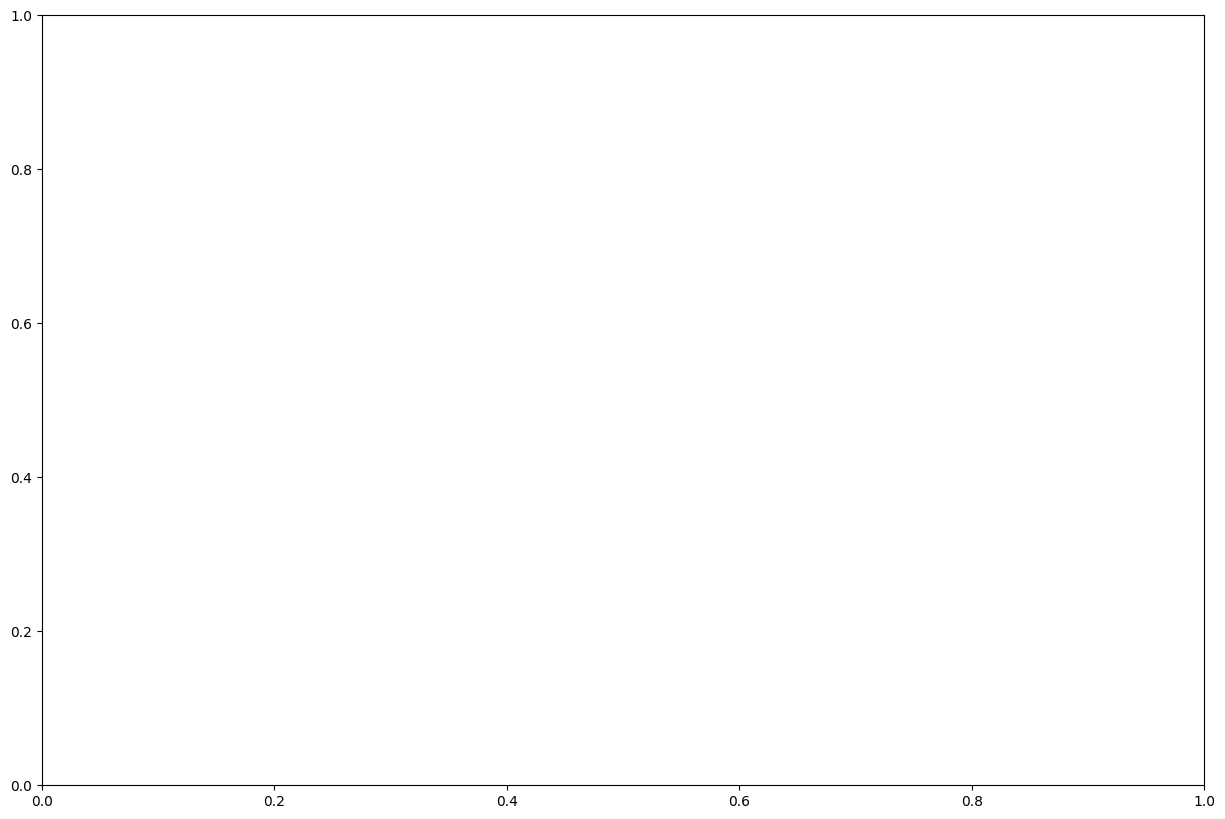

In [6]:
G2P_eval.distance_calc()

In [ ]:
distances_df.to_csv('GSE106159_dist.csv')



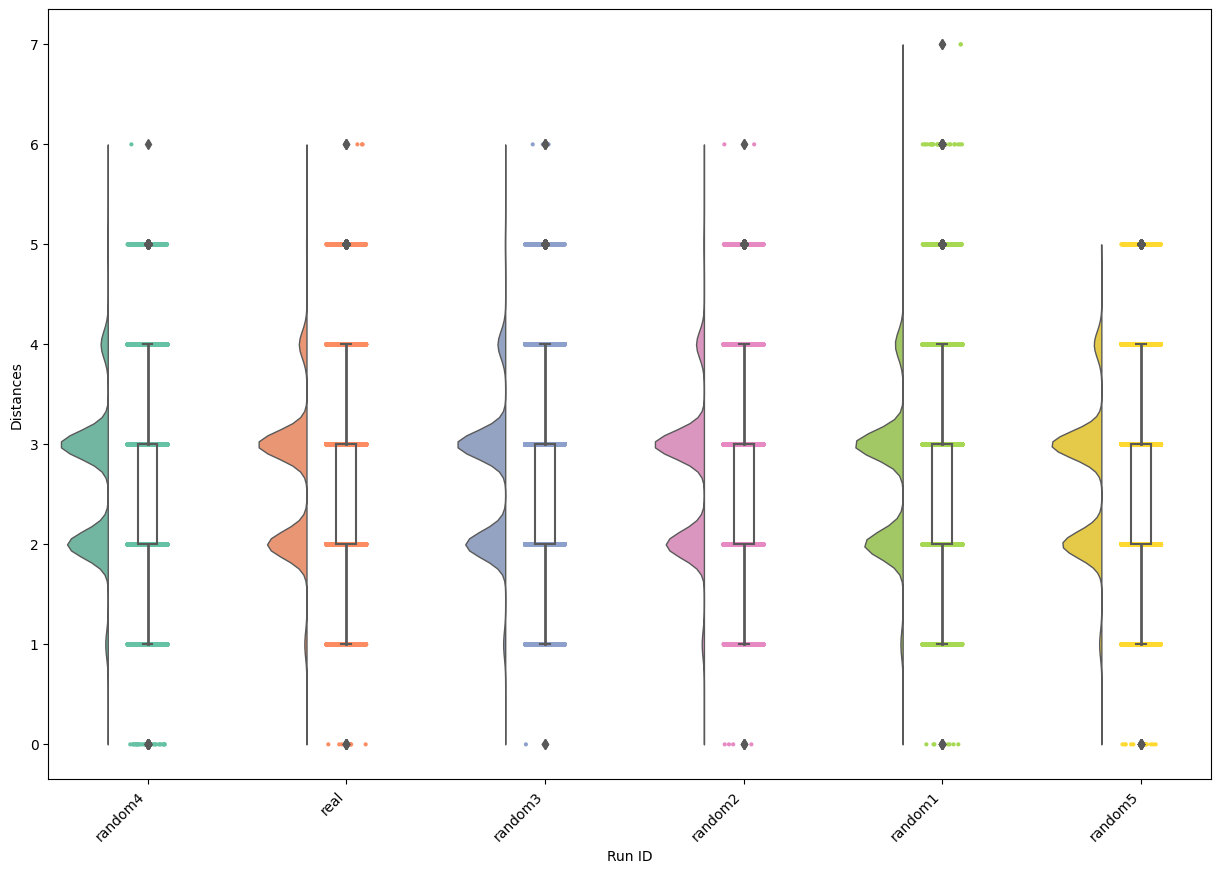

In [ ]:
plot_df = distances_df.loc[:,['Run ID', 'Distances']]
plot_df
import ptitprince as pt

plt.figure(figsize=(15, 10))
ax = pt.RainCloud(data = plot_df, x = 'Run ID', y = 'Distances', palette = "Set2",
                    orient = 'v', width_box= .1, width_viol=.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  ha='right')
# test_results = st.add_stat_annotation(ax, data=formatted_df, x='Label', y='Normalized Degree', 
#                                         box_pairs=[(self.selected_thresholds[i], self.selected_thresholds[j]) for i in range(len(self.selected_thresholds)) for j in range(i+1, len(self.selected_thresholds))],
#                                         test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.show()


### Comments

In this case, we observe the expected behaviour: the number of elements connected is higher when using the all_paths option. The reason for this is that, by doing pagerank threshold>all_paths>sign_consistency>shortest_path, we actually prioritise nodes that are sign consistent over the shortest paths. Therefore, many targets will be connected via paths that are sign consistent but not shortest and thus, not appearing in our other option (pagerank_threshold>shortest_path>sign_consistency).

# GSE115311

Dysfunction of blood vessels leads to severe vasculature pathogenesis. Previous studies have demonstrated that constitutive NFkB activation results in chronic vascular inflammation, leading to various cardiovascular diseases. However, how NFkB regulates blood vessel homeostasis remains largely elusive. Here, using CRISPR/Cas9-mediated gene editing, we generated RelA knockout human embryonic stem cells (hESCs) and differentiated them into human vascular derivatives to study how NFkB modulates vascular cells under basal and inflammatory conditions. Multi-dimensional phenotypic assessments and transcriptomic analyses revealed that RelA deficiency affected vascular cells via modulating vascular inflammation, survival, vasculogenesis, differentiation and extracellular matrix organization in a cell type-specific manner under basal condition, and that RelA protected vascular cells against apoptosis and modulated vascular inflammatory response upon TNFa stimuli. Lastly, further evaluation of gene expression patterns in IkBa knockout vascular cells demonstrated that IkBa acted largely independent of NFkB signaling pathway. Taken together, our data reveals a protective role of NFkB/RelA in modulating human blood vessel homeostasis and maps the human vascular transcriptomic landscapes for the discovery of novel therapeutic targets.

In [4]:
# Load dataset
gex_GEO2 = pd.read_csv('GSE115311-expression.txt', sep='\t', index_col=0)
meta_GEO2 = pd.read_csv('GSE115311-metadata.txt', sep='\t', index_col=0)

# Preview expression data
gex_GEO2.head()

GSM3175340  GSM3175341  GSM3175342  GSM3175343  GSM3175344  \
gene_symbol                                                               
A1BG                203         234         235         235         252   
A1CF                  2           0           1           3           0   
A2M                3905        4517        5976        5275        3180   
A2ML1                 3           9           1           5           3   
A2MP1                 2           0           0           3           0   

             GSM3175345  GSM3175346  GSM3175347  GSM3175348  GSM3175349  ...  \
gene_symbol                                                              ...   
A1BG                167         259         255         206         206  ...   
A1CF                  3           1           3           3           0  ...   
A2M                2742        2492        2900        4990        4318  ...   
A2ML1                 7           0           1           7           2  ...   
A2MP1                 0           2           1           0           1  ...   

             GSM3175372  GSM3175373  GSM3175374  GSM3175375  GSM3175376  \
gene_symbol                                                               
A1BG                294         322         316         324         347   
A1CF                  6           4           0           1           2   
A2M                   3           3           5           7          14   
A2ML1                 2           1           6           3           6   
A2MP1                25          28           1           0           0   

             GSM3175377  GSM3175378  GSM3175379  GSM3175380  GSM3175381  
gene_symbol                                                              
A1BG                436         352         381         411         379  
A1CF                  1           1           2           0           2  
A2M                   1           6           5          10           6  
A2ML1                 4           1           2          10           2  
A2MP1                 0          12          12           0           0  

[5 rows x 38 columns]

In [5]:
subset_meta_GEO2 = meta_GEO2[(meta_GEO2['genotype'] == 'WT') | (meta_GEO2['genotype'] == 'RelA Knockout')]
subset_meta_GEO2.head()

Sample Title  \
Sample_geo_accession                          
GSM3175340                 VEC_WT_TNFa_rep1   
GSM3175341                 VEC_WT_TNFa_rep2   
GSM3175342                VEC_WT_basal_rep1   
GSM3175343                VEC_WT_basal_rep2   
GSM3175348            VEC_RelA_KO_TNFa_rep1   

                                                  cell type       genotype  \
Sample_geo_accession                                                         
GSM3175340            ES-derived vascular endothelial cells             WT   
GSM3175341            ES-derived vascular endothelial cells             WT   
GSM3175342            ES-derived vascular endothelial cells             WT   
GSM3175343            ES-derived vascular endothelial cells             WT   
GSM3175348            ES-derived vascular endothelial cells  RelA Knockout   

                     passage  
Sample_geo_accession          
GSM3175340                p2  
GSM3175341                p2  
GSM3175342                p2  
GSM3175343                p2  
GSM3175348                p2

In [6]:
subset_gex_GEO2 = gex_GEO2[subset_meta_GEO2.index]
subset_gex_GEO2.head()

GSM3175340  GSM3175341  GSM3175342  GSM3175343  GSM3175348  \
gene_symbol                                                               
A1BG                203         234         235         235         206   
A1CF                  2           0           1           3           3   
A2M                3905        4517        5976        5275        4990   
A2ML1                 3           9           1           5           7   
A2MP1                 2           0           0           3           0   

             GSM3175349  GSM3175351  GSM3175352  GSM3175353  GSM3175355  ...  \
gene_symbol                                                              ...   
A1BG                206         190         685         565         685  ...   
A1CF                  0           4           3           3           4  ...   
A2M                4318        5369         237         196         290  ...   
A2ML1                 2           1           4           2           2  ...   
A2MP1                 1           0           1           1           0  ...   

             GSM3175366  GSM3175367  GSM3175368  GSM3175369  GSM3175376  \
gene_symbol                                                               
A1BG                323         286         323         371         347   
A1CF                  5           5           1           2           2   
A2M                   8          12           4           3          14   
A2ML1                 3           4           8          13           6   
A2MP1                20          25           0           0           0   

             GSM3175377  GSM3175378  GSM3175379  GSM3175380  GSM3175381  
gene_symbol                                                              
A1BG                436         352         381         411         379  
A1CF                  1           1           2           0           2  
A2M                   1           6           5          10           6  
A2ML1                 4           1           2          10           2  
A2MP1                 0          12          12           0           0  

[5 rows x 24 columns]

In [7]:
# pandas2ri.activate()

# base = importr('base')
# stats = importr('stats')
# DESeq2 = importr('DESeq2')

# import pandas as pd

# col_data = subset_meta_GEO2[['genotype']]
# col_data['genotype'] = stats.relevel(robjects.FactorVector(col_data['genotype']), ref="WT")

# dds = DESeq2.DESeqDataSetFromMatrix(countData=subset_gex_GEO2, colData=col_data, design=robjects.Formula("~ genotype"))

# dds = DESeq2.DESeq(dds)

# res = DESeq2.results(dds)

# res_df = robjects.r['as.data.frame'](res)
# res_df_pandas = robjects.conversion.rpy2py(res_df)

# de_GEO2 = res_df_pandas.sort_values(by='stat', ascending=False, key=lambda col: col.abs())

# de_GEO2.to_csv('GSE115311_de.csv', sep='\t', index=True)

# de_GEO2

In [8]:
de_GEO2 = pd.read_csv('GSE115311_de.csv', sep='\t', index_col=0)
de_GEO2.head()

baseMean  log2FoldChange     lfcSE       stat         pvalue  \
RELA     743.114014       -6.182934  0.193405 -31.968902  2.951086e-224   
CLEC11A  132.698189       -5.443546  0.225478 -24.142236  9.009184e-129   
CXCL10    17.349744      -22.254813  1.689628 -13.171428   1.281508e-39   
ZNF585B   40.121314       -2.499739  0.208237 -12.004309   3.372703e-33   
MYH7      11.564827      -21.719423  1.948960 -11.144110   7.650503e-29   

                  padj  
RELA     5.348843e-220  
CLEC11A  8.164573e-125  
CXCL10    7.742444e-36  
ZNF585B   1.528256e-29  
MYH7      2.773307e-25

In [9]:
de_GEO2_subset = de_GEO2.head(100)

In [10]:
targetsdf_GEO2 = de_GEO2_subset[['stat']]

targetsdf_GEO2['stat'] = np.where(targetsdf_GEO2['stat'] > 0, 1, np.where(targetsdf_GEO2['stat'] < 0, -1, targetsdf_GEO2['stat']))

target_GEO2 = targetsdf_GEO2['stat'].to_dict()

/tmp/ipykernel_849/3177352836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targetsdf_GEO2['stat'] = np.where(targetsdf_GEO2['stat'] > 0, 1, np.where(targetsdf_GEO2['stat'] < 0, -1, targetsdf_GEO2['stat']))


In [11]:
G3P_solver = Solver(G, 'GSE115311')
G3P_solver.source_dict = {'RELA': -1}
filtered_target_dict = {key: value for key, value in target_GEO2.items() if key in G.nodes() and key not in G3P_solver.source_dict.keys()}
G3P_solver.target_dict = filtered_target_dict

Computing path 1 with threshold 0.01
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 1 with threshold 0.009
Computing path 1 with threshold 0.008
Computing path 1 with threshold 0.007
Computing path 1 with threshold 0.006
Computing path 1 with threshold 0.005
Computing path 1 with threshold 0.004
Computing path 1 with threshold 0.003
Computing path 1 with threshold 0.002
Computing path 1 with threshold 0.001
Computing path 1 with threshold 0.0
Computing path 2 with threshold 0.01
There were no sign consistent paths for the given perturbations and downstream effects.
Computing path 2 with threshold 0.009
Computing path 2 with threshold 0.008
Computing path 2 with threshold 0.007
Computing path 2 with threshold 0.006
Computing path 2 with threshold 0.005
Computing path 2 with threshold 0.004
Computing path 2 with threshold 0.003
Computing path 2 with threshold 0.002
Computing path 2 with threshold 0.001
The graph is too large to visu

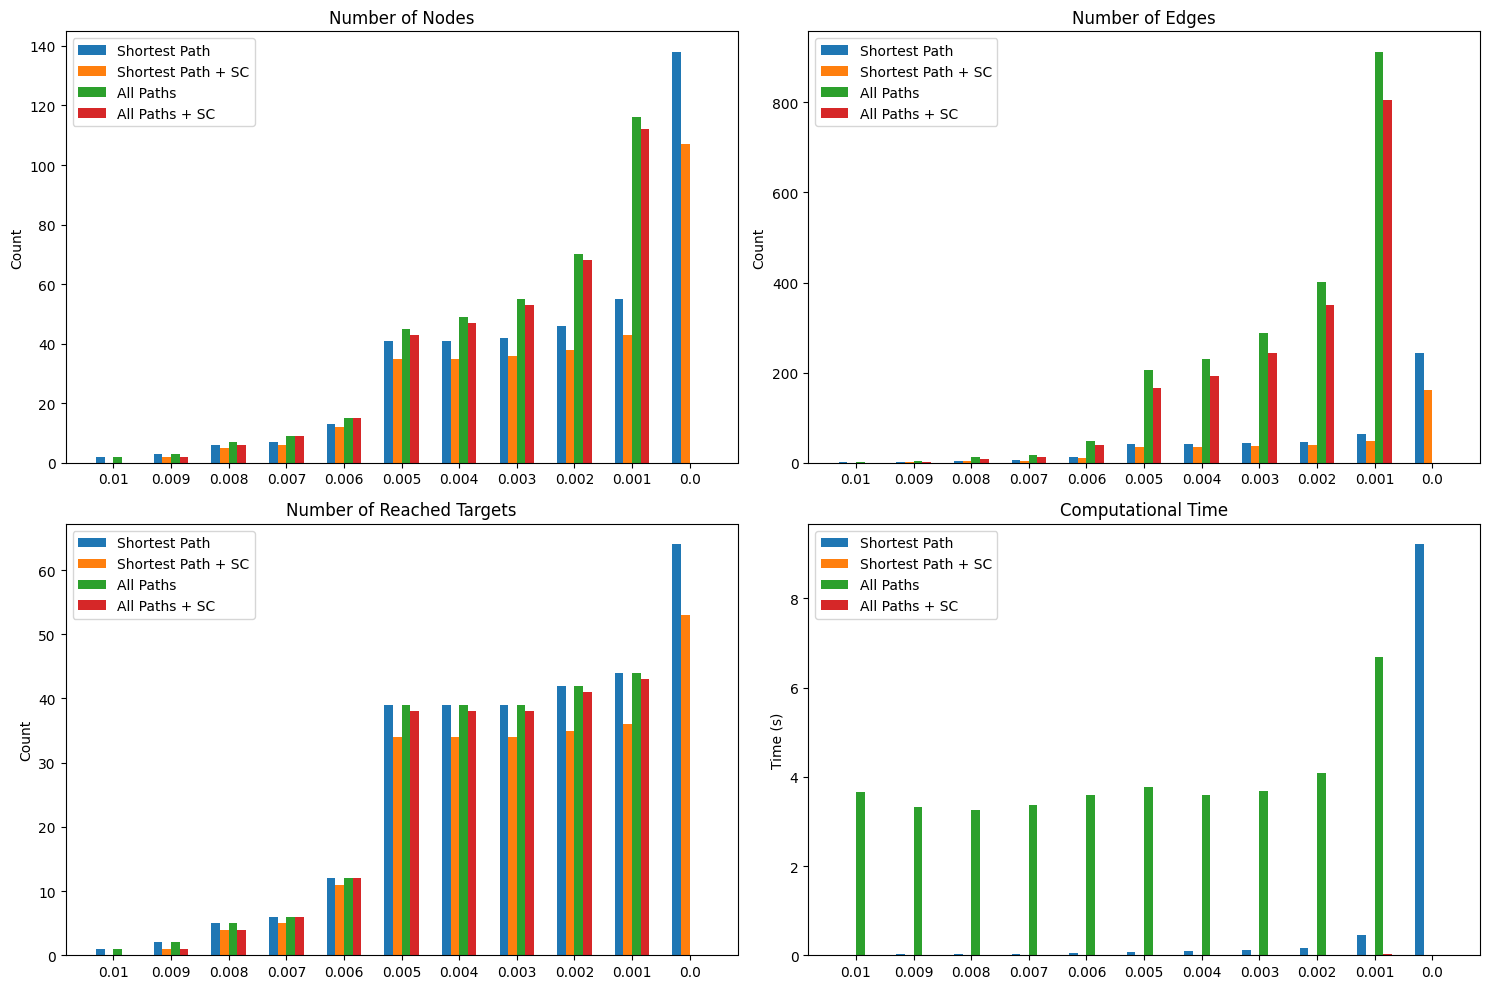

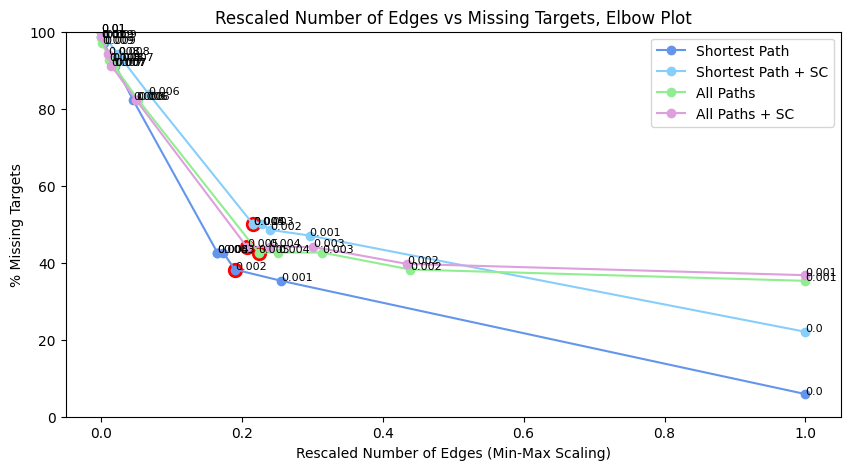

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

__pagerank_0.0__shortest v.s. __pagerank_0.0__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.394e-01 U_stat=5.967e+03
__pagerank_0.0__shortest__sc v.s. __pagerank_0.002__shortest: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.138e-06 U_stat=1.201e+03
__pagerank_0.002__shortest v.s. __pagerank_0.005__shortest__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.989e-07 U_stat=2.580e+02
__pagerank_0.005__shortest__sc v.s. __pagerank_0.005__reachability__allpaths: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.577e-09 U_stat=1.420e+02
__pagerank_0.005__reachability__allpaths v.s. __pagerank_0.005__reachability__allpaths__sc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=

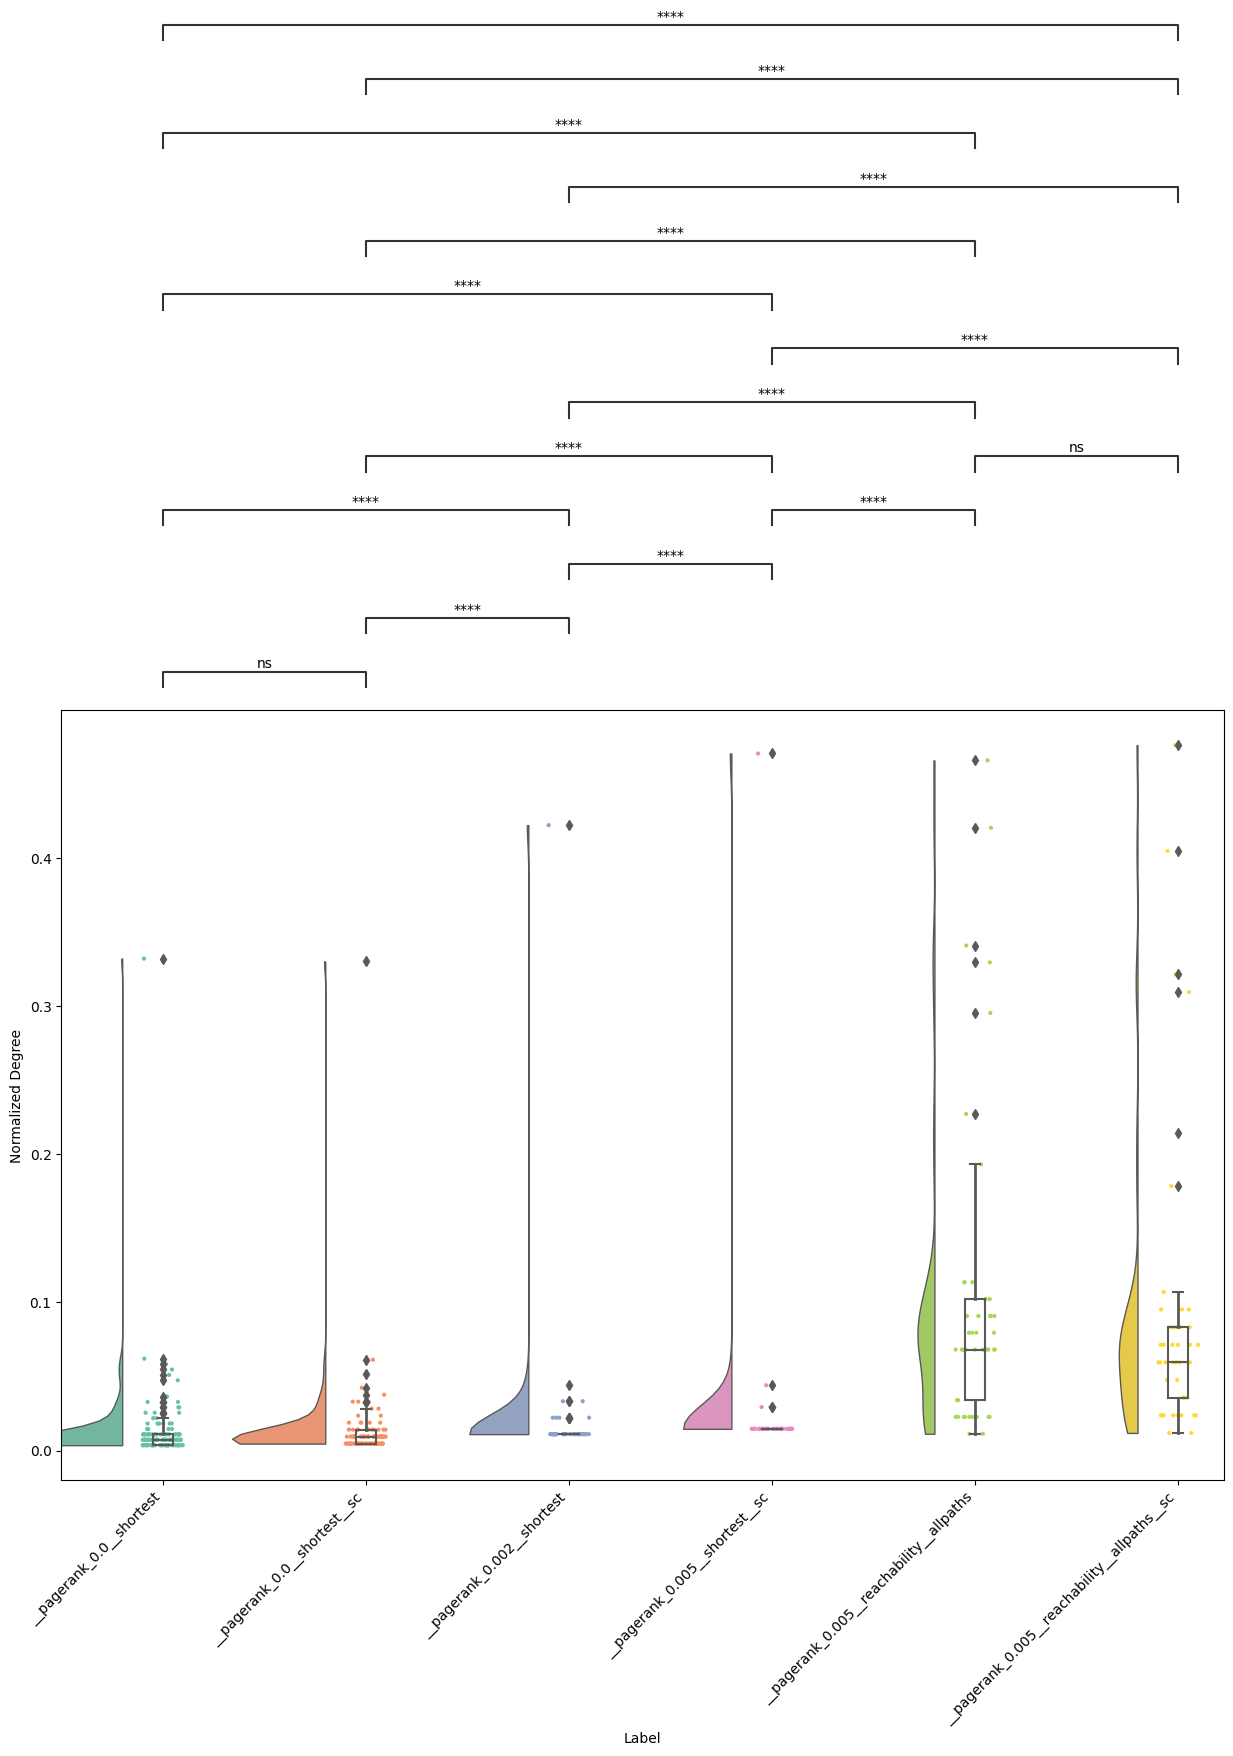

['GSE115311__reachability__pagerank_0.0__shortest__sc.sif', 'GSE115311__reachability__pagerank_0.005__reachability__allpaths.sif', 'GSE115311__reachability__pagerank_0.005__reachability__allpaths__sc.sif', 'GSE115311__reachability__pagerank_0.002__shortest.sif', 'GSE115311__reachability__pagerank_0.005__shortest__sc.sif', 'GSE115311__reachability__pagerank_0.0__shortest.sif']


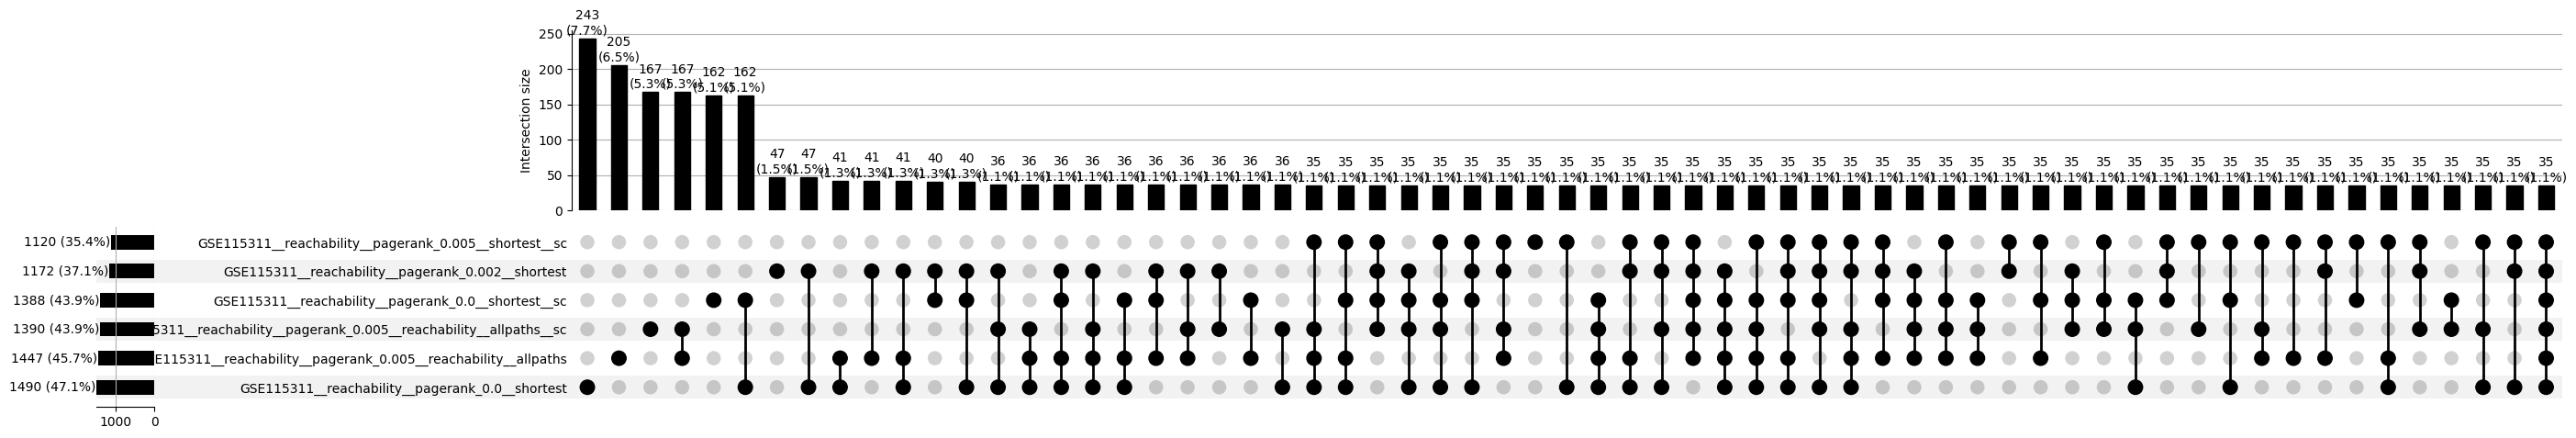

In [24]:
G3P_solver.network_batchrun()

In [12]:
from evaluation import Eval

In [16]:
G2P_eval = Eval(G, "./results/", "GSE106159")

In [18]:
G2P_eval.graphs

{'GSE106159__random4__reachability__pagerank_0.008__reachability__allpaths': <networkx.classes.digraph.DiGraph at 0x7f1c38d9f4f0>,
 'GSE106159__random4__reachability__pagerank_0.005__shortest__sc': <networkx.classes.digraph.DiGraph at 0x7f1c38d9f6d0>,
 'GSE106159__random5__reachability__pagerank_0.009__shortest': <networkx.classes.digraph.DiGraph at 0x7f1c38d9ee90>,
 'GSE106159__real__reachability__pagerank_0.003__shortest': <networkx.classes.digraph.DiGraph at 0x7f1c38d9ee00>,
 'GSE106159__random3__reachability__pagerank_0.003__shortest__sc': <networkx.classes.digraph.DiGraph at 0x7f1c38d9ee30>,
 'GSE106159__random2__reachability__pagerank_0.006__reachability__allpaths__sc': <networkx.classes.digraph.DiGraph at 0x7f1c38d9dc00>,
 'GSE106159__random2__reachability__pagerank_0.002__shortest': <networkx.classes.digraph.DiGraph at 0x7f1c38d9f5b0>,
 'GSE106159__random5__reachability__pagerank_0.009__shortest__sc': <networkx.classes.digraph.DiGraph at 0x7f1c38d9f0d0>,
 'GSE106159__random2__r